<a href="https://colab.research.google.com/github/davzip/Credit_Card_Fraud/blob/main/Credit_Card_Fraud_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard_data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284806, 31)

In [4]:
df.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405008e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df['Class'].value_counts() # 0 is non-fraudulent and 1 is fraudulent transactions

0    284314
1       492
Name: Class, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

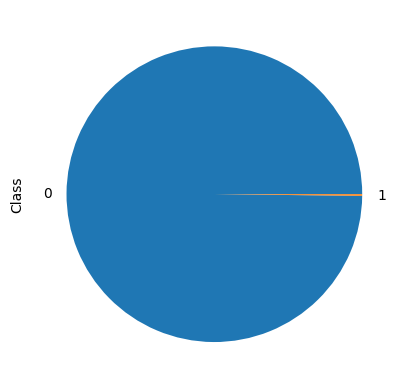

In [7]:
print((df.groupby('Class')['Class'].count()/df['Class'].count()) *100) # getting percentages of non-fraudelnt to fraudulent transactions

((df.groupby('Class')['Class'].count()/df['Class'].count()) *100).plot.pie() # visual

In [8]:
classes = df['Class'].value_counts()
total = df['Class'].count()

normal_share = classes[0]/total * 100
fraud_share = classes[1]/total * 100

print(normal_share, fraud_share)

99.82725083038981 0.1727491696101908


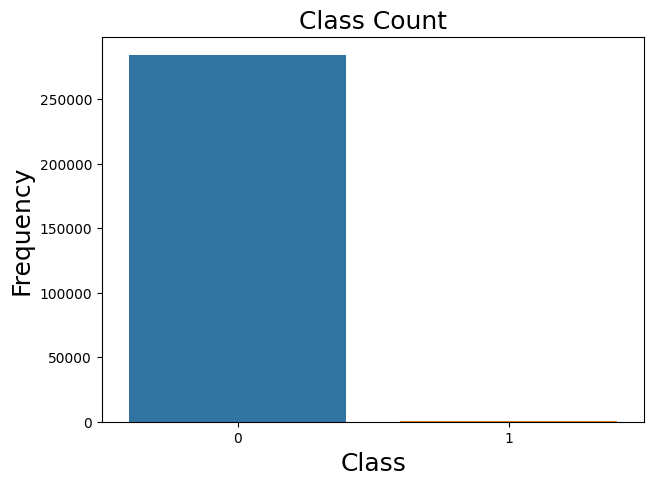

In [9]:
# bar plot
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Class')
plt.title("Class Count", fontsize=18)
plt.xlabel("Class",fontsize=18)
plt.ylabel("Frequency",fontsize =18)
plt.show()

In [10]:
#checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173984e-01,-1.059272e-02,-4.196230e-01,-1.052587e-01,1.730730e-01,-6.301398e-02,8.470767e-02,-3.694762e-02,-8.663029e-03,...,4.473390e-02,1.440548e-01,5.113916e-02,-1.618203e-02,-2.330790e-01,-4.139772e-02,-5.134581e-03,-9.412971e-03,-0.010599,-0.012322
V1,0.117398,1.000000e+00,-1.098624e-07,4.435455e-07,-3.419080e-07,-8.694801e-09,-4.662443e-07,1.218935e-06,-3.319674e-07,4.231489e-07,...,3.398400e-07,8.473373e-07,5.769342e-07,1.388833e-08,-8.688316e-07,-1.622534e-06,-5.714209e-09,3.953780e-08,-0.227708,-0.101347
V2,-0.010593,-1.098624e-07,1.000000e+00,1.871392e-07,-1.442564e-07,-3.668784e-09,-1.967118e-07,5.142857e-07,-1.400610e-07,1.785308e-07,...,1.433853e-07,3.574983e-07,2.434103e-07,5.860695e-09,-3.665696e-07,-6.845636e-07,-2.415081e-09,1.668431e-08,-0.531409,0.091289
V3,-0.419623,4.435455e-07,1.871392e-07,1.000000e+00,5.823775e-07,1.480005e-08,7.941612e-07,-2.076230e-06,5.654478e-07,-7.207571e-07,...,-5.788599e-07,-1.443281e-06,-9.827024e-07,-2.365457e-08,1.479898e-06,2.763690e-06,9.741052e-09,-6.734186e-08,-0.210881,-0.192961
V4,-0.105259,-3.419080e-07,-1.442564e-07,5.823775e-07,1.000000e+00,-1.141195e-08,-6.121767e-07,1.600461e-06,-4.358746e-07,5.555930e-07,...,4.462109e-07,1.112550e-06,7.575133e-07,1.823434e-08,-1.140774e-06,-2.130388e-06,-7.514214e-09,5.191151e-08,0.098732,0.133447
V5,0.173073,-8.694801e-09,-3.668784e-09,1.480005e-08,-1.141195e-08,1.000000e+00,-1.556168e-08,4.069958e-08,-1.108203e-08,1.412224e-08,...,1.134104e-08,2.828181e-08,1.925978e-08,4.632979e-10,-2.899717e-08,-5.415482e-08,-1.930995e-10,1.329769e-09,-0.386356,-0.094974
V6,-0.063014,-4.662443e-07,-1.967118e-07,7.941612e-07,-6.121767e-07,-1.556168e-08,1.000000e+00,2.182472e-06,-5.943839e-07,7.576399e-07,...,6.084826e-07,1.517132e-06,1.032991e-06,2.487012e-08,-1.555627e-06,-2.905109e-06,-1.024332e-08,7.079262e-08,0.215982,-0.043643
V7,0.084708,1.218935e-06,5.142857e-07,-2.076230e-06,1.600461e-06,4.069958e-08,2.182472e-06,1.000000e+00,1.553945e-06,-1.980746e-06,...,-1.590793e-06,-3.966350e-06,-2.700630e-06,-6.501824e-08,4.066979e-06,7.595039e-06,2.677044e-08,-1.850795e-07,0.397310,-0.187257
V8,-0.036948,-3.319674e-07,-1.400610e-07,5.654478e-07,-4.358746e-07,-1.108203e-08,-5.943839e-07,1.553945e-06,1.000000e+00,5.394418e-07,...,4.332393e-07,1.080208e-06,7.354993e-07,1.770554e-08,-1.107620e-06,-2.068462e-06,-7.297882e-09,5.040720e-08,-0.103079,0.019875
V9,-0.008663,4.231489e-07,1.785308e-07,-7.207571e-07,5.555930e-07,1.412224e-08,7.576399e-07,-1.980746e-06,5.394418e-07,1.000000e+00,...,-5.522357e-07,-1.376904e-06,-9.375128e-07,-2.256909e-08,1.411835e-06,2.636590e-06,9.300299e-09,-6.425117e-08,-0.044246,-0.097733


<function matplotlib.pyplot.show(close=None, block=None)>

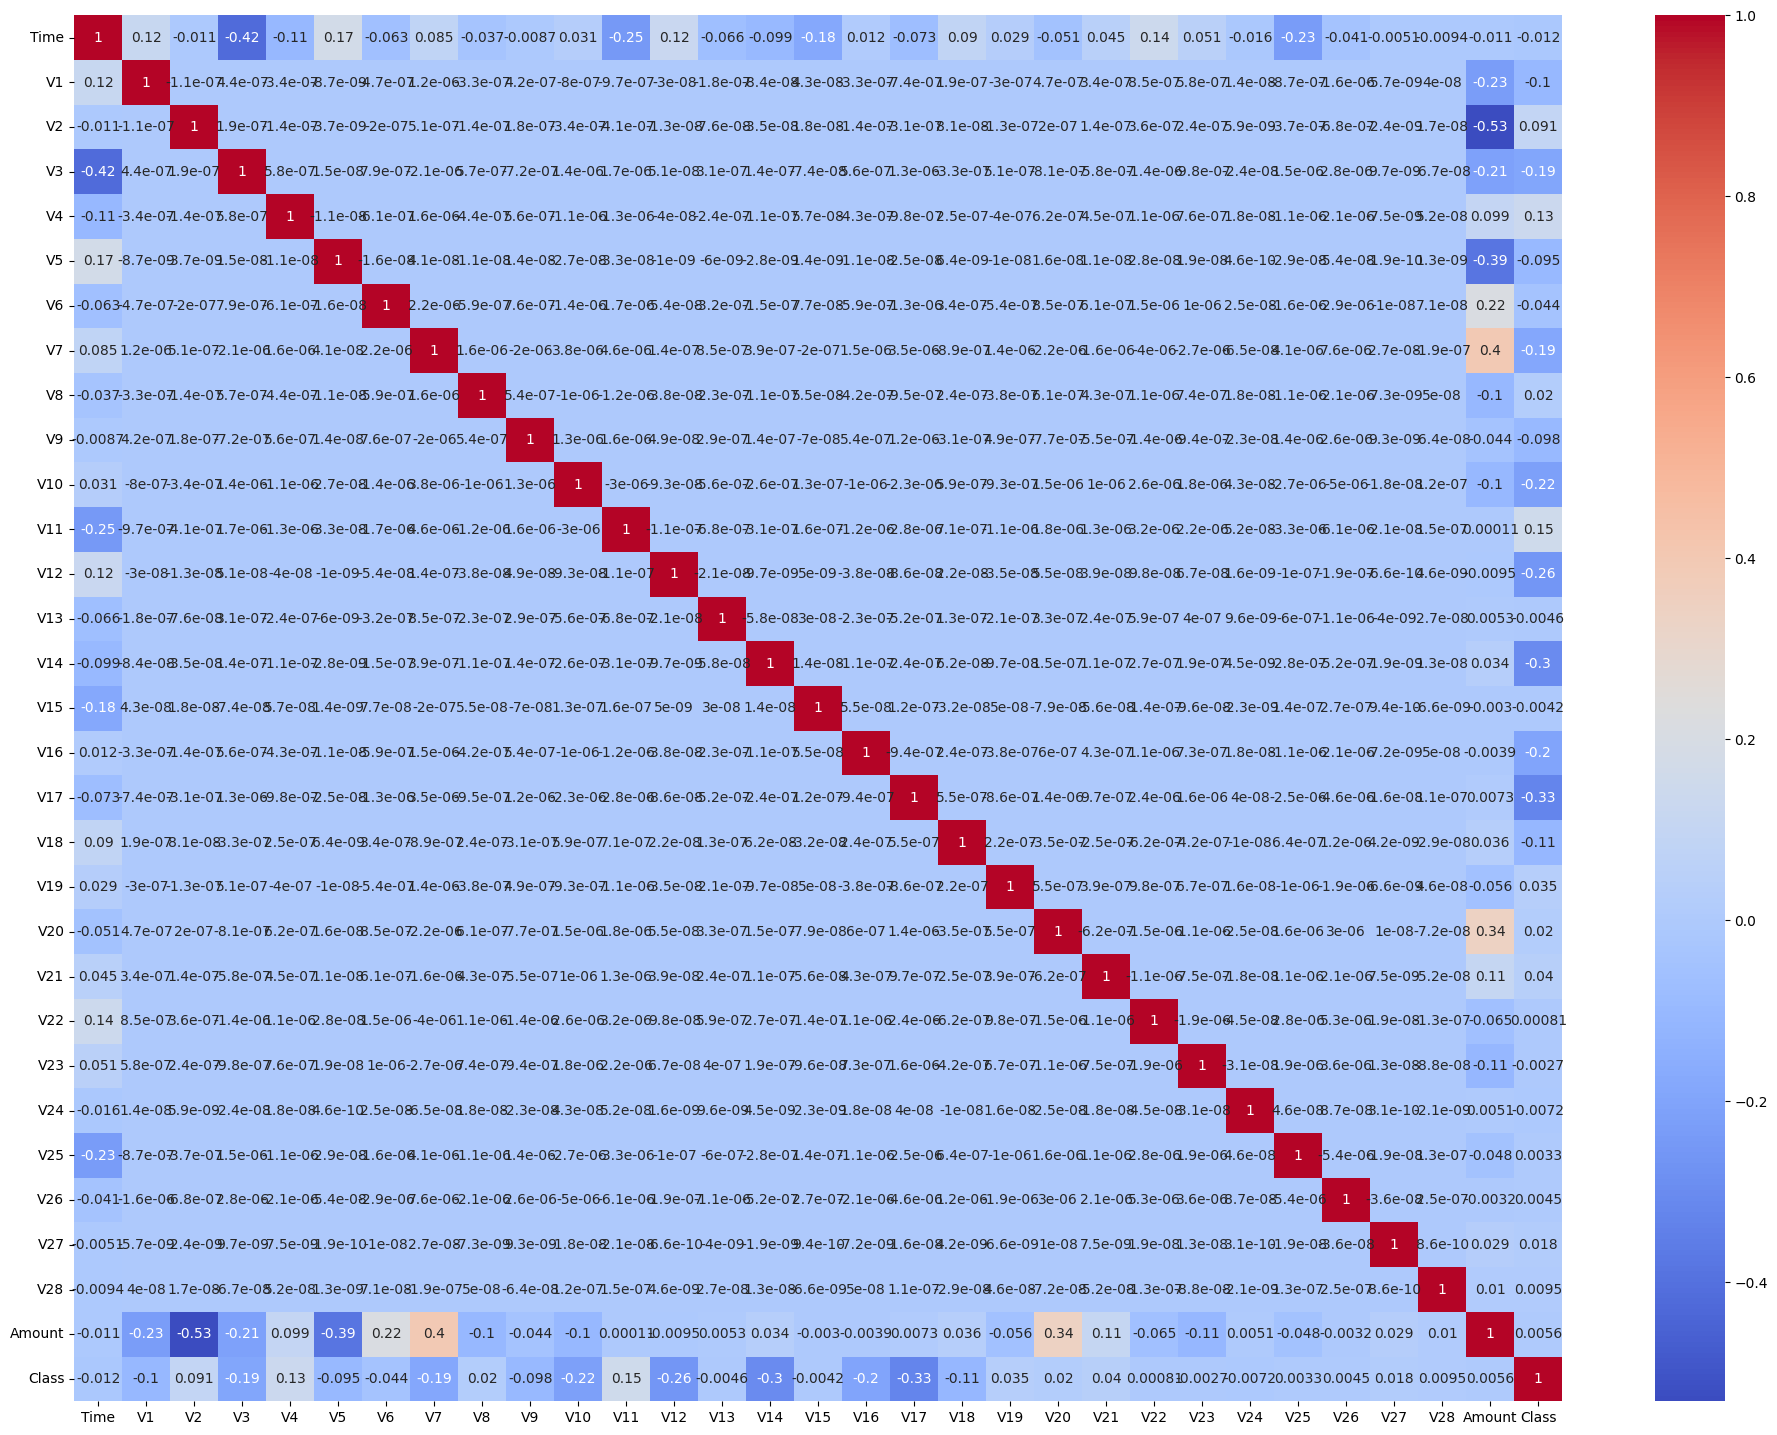

In [11]:
plt.figure(figsize=(24,18))
sns.heatmap(corr, cmap="coolwarm", annot = True)
plt.show

In [12]:
# investigating time
Delta_Time = pd.to_timedelta(df['Time'], unit = 's')

#create derived columns Mins and hours
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df.drop('Time',axis =1 , inplace=True)


Splitting the data into train and test data   

In [13]:
# Splitting the dataset into x and y
y = df['Class']
X = df.drop(['Class'],axis =1)
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,test_size=0.2)

In [16]:
#cheacking the spread of data split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
388
104


PLotting the distribution

In [17]:
cols = list(X.columns.values)

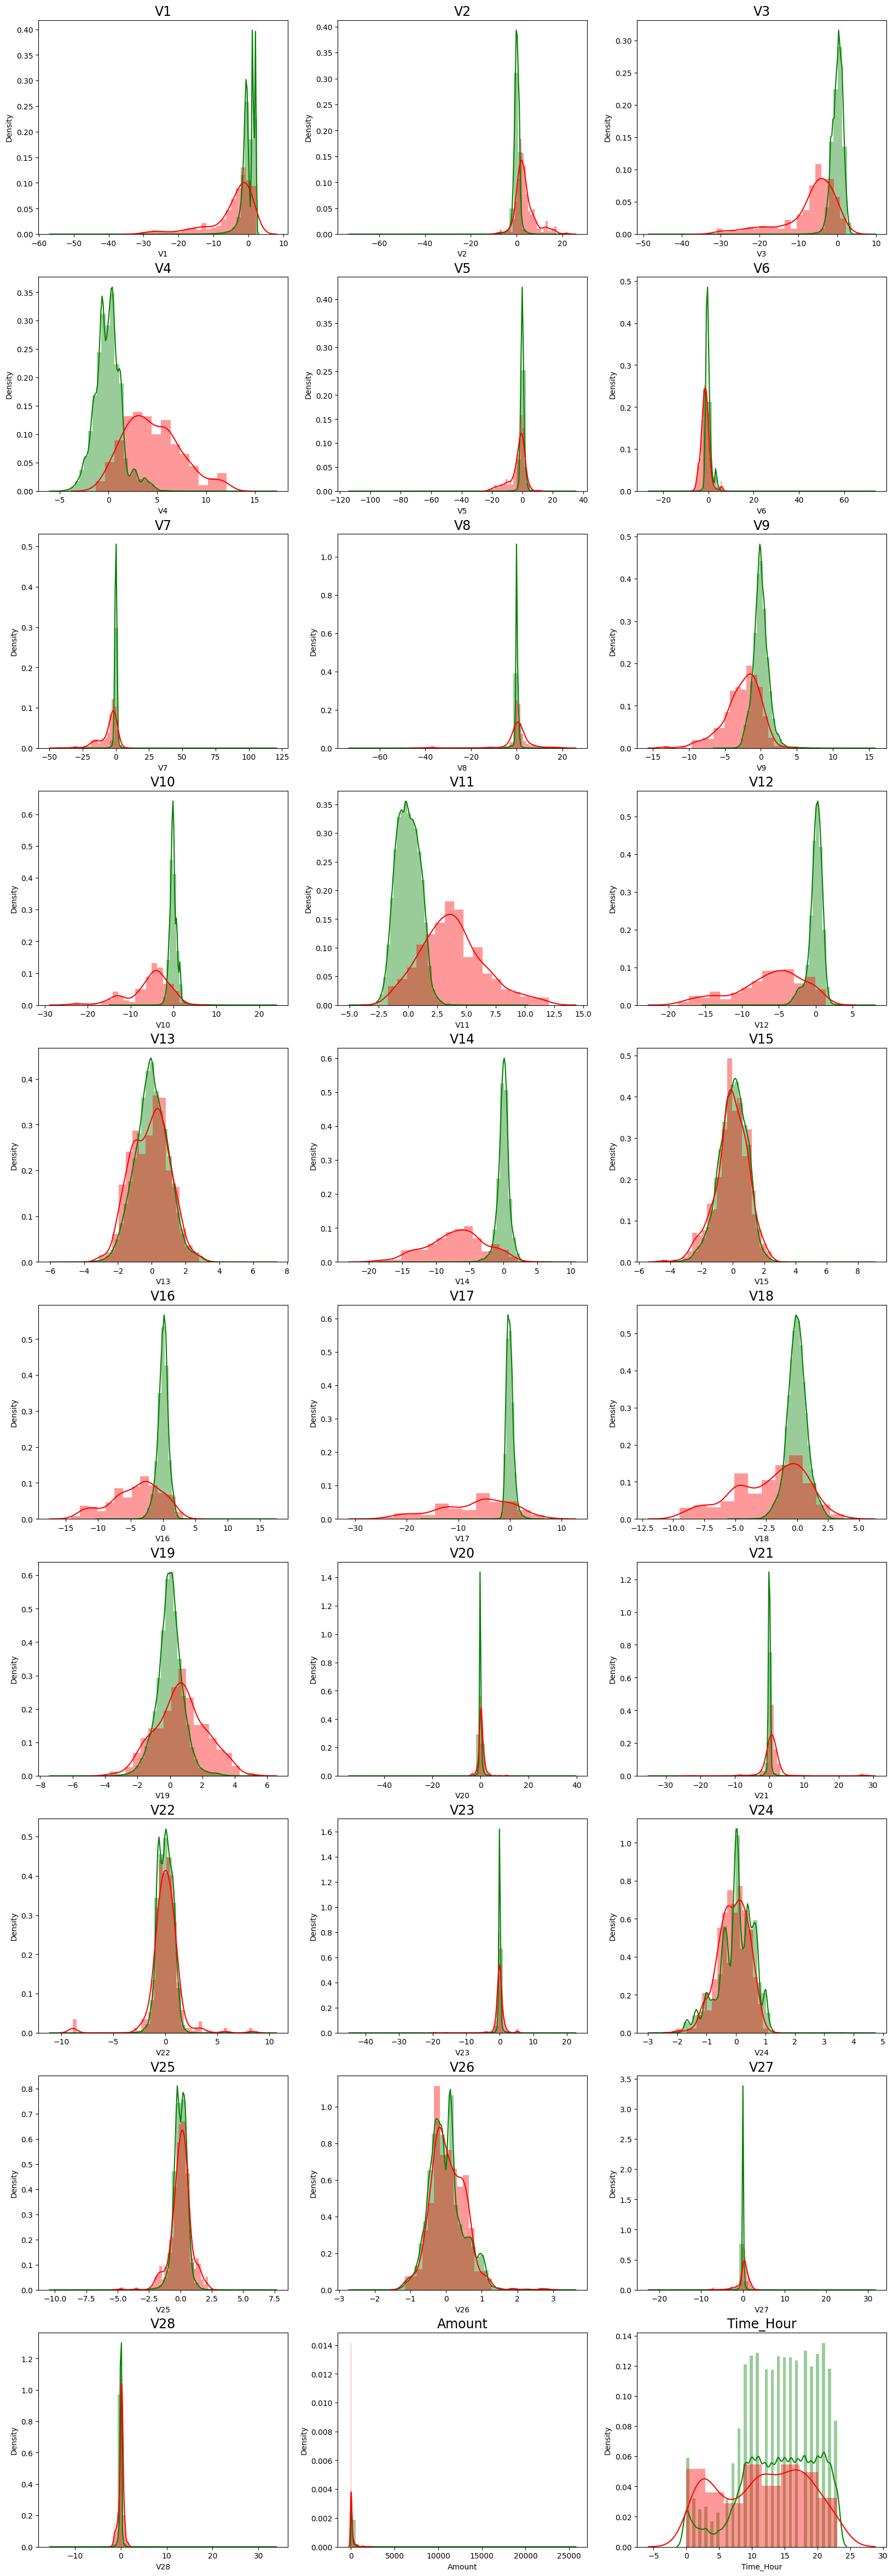

In [18]:
#plot the histogram of a variable from the dataset to see skewness
normal_records = df.Class == 0
fraud_records = df.Class ==1

plt.figure(figsize = (20,60))

for n, col in enumerate(cols):
  plt.subplot(10,3, n+1)
  sns.distplot(X[col][normal_records], color = 'green')
  sns.distplot(X[col][fraud_records], color = 'red')
  plt.title(col, fontsize = 17)
plt.show()

Model Building  

In [19]:
df_Results = pd.DataFrame(columns = ['Methodology', 'Model', 'Accuracy', 'roc_value','threshold'])

In [20]:
# Created a common function to plot confusion matrix

def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Accent)
  categoryNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames, rotation = 45)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  for i in  range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]),fontsize = 12)
  plt.show()


In [21]:
# function to fit and predict on a Logistic Regression model for l1 and l2
def buildAndRunLogisticModels (df_Results, Methodology, X_train, y_train, X_test, y_test):
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_c = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10,shuffle=True,random_state = 42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
      Cs = num_c,
      penalty = 'l2',
      scoring = 'roc_auc',
      cv = cv_num,
      random_state=42,
      max_iter=10000,
      fit_intercept=True,
      solver='newton-cg',
      tol = 10
  )

  searchCV_l1 = linear_model.LogisticRegressionCV(
      Cs = num_c,
      penalty = 'l1',
      scoring = 'roc_auc',
      cv = cv_num,
      random_state=42,
      max_iter=10000,
      fit_intercept=True,
      solver='liblinear',
      tol = 10
  )

  searchCV_l1.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  print('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())
  print('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())

  print('Parameters for l1 regularisations')
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)

  print('Parameters for l2 regularisations')
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)

  #find predicted values
  y_pred_l1 = searchCV_l1.predict(X_test)
  y_pred_l2 = searchCV_l2.predict(X_test)

  #Find predicted probabilities
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]

  #Accuracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred = y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred = y_pred_l1, y_true=y_test)

  print("Accuracy of Logistic model with l2 regulation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))

  print("Accuracy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification report")
  print(classification_report(y_test,y_pred_l1))

  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}".format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2, 'roc_value':l2_roc_value,'threshold': threshold}, index=[0]), ignore_index = True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}".format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label = "Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1, 'roc_value':l1_roc_value,'threshold': threshold}, index=[0]), ignore_index = True)
  return df_Results


In [22]:
def buildAndRunKNNModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  #create KNN model and fir the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = 16)
  knn.fit(X_train, y_train)
  score = knn.score(X_test, y_test)
  print("model score")
  print(score)

  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred = y_pred, y_true = y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  knn_probs = knn.predict_proba(X_test)[:,1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}".format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology, 'Model': 'KNN', 'Accuracy': score, 'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index=True)
  return df_Results


In [23]:
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  #Evaluate Decision Tree model with 'gini' & 'entropy'
  criteria = ['gini', 'entropy']
  scores = {}

  for c in criteria:
    dt = DecisionTreeClassifier(criterion = c, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    test_score = dt.score(X_test, y_test)
    tree_preds = dt.predict_proba(X_test)[:,1]
    tree_roc_value = roc_auc_score(y_test,tree_preds)
    scores = test_score
    print(c+" score: {0}".format(test_score))
    print("Confusion Matrix")
    Plot_confusion_matrix(y_test, y_pred)
    print("classification Report")
    print(classification_report(y_test, y_pred))
    print(c+" tree_roc_value:{0}".format(tree_roc_value))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Tree threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr,tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = df_Results.append(pd.DataFrame({'Methodology': Methodology,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)

  return df_Results

In [24]:
def buildAndRunRandomForestModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  #Evaluate Random Forest model
  #create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features= 'sqrt', random_state = 42)

  #Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))

  #Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  #calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}".format(roc_curve))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]

  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr,tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({"Methodology": Methodology, 'Model': 'Random Forest', 'Accuracy': RF_test_score, 'roc_value': roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)
  return df_Results


In [25]:
def buildAndRunXGBoostModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train,y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:,1]

  #Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}".format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr - fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr,tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({"Methodology": Methodology, 'Model': 'XGBoost', 'Accuracy': XGB_test_score, 'roc_value': XGB_roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)

  return df_Results



In [26]:
def BuildAndRunSVMModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
  #Evaluate SVM model with sigmoid kernal model
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  clf = SVC(kernel = 'sigmoid', random_state=42)
  clf.fit(X_train, y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test, y_pred_SVM)

  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test,y_pred_SVM))

  #Run Classifier
  classifier = SVC(kernel = 'sigmoid', probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:,1]

  # Roc auc
  roc_value = roc_auc_score(y_test, svm_probs)

  print("SVM roc_value: {0}".format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = df_Results.append(pd.DataFrame({"Methodology": Methodology, 'Model': 'SVM', 'Accuracy': SVM_Score, 'roc_value': roc_value, 'threshold': threshold}, index=[0]), ignore_index=True)
  return df_Results


Build different Models on the imbalanced dataset and see the result

**Perforrm cross validation with RepeatedKFold**

In [27]:
# Repeated KFold and results
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats = 10, random_state=None)

# X is the feature set and y is the target set
for train_index, test_index in rkf.split(X,y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     3      4      7 ... 284789 284800 284801]
TRAIN: [     0      1      3 ... 284803 284804 284805] TEST: [     2      6     11 ... 284788 284795 284796]
TRAIN: [     0      1      2 ... 284803 284804 284805] TEST: [     8      9     12 ... 284779 284790 284797]
TRAIN: [     0      1      2 ... 284802 284803 284804] TEST: [    17     20     22 ... 284793 284794 284805]
TRAIN: [     2      3      4 ... 284800 284801 284805] TEST: [     0      1      5 ... 284802 284803 284804]
TRAIN: [     0      1      2 ... 284801 284803 284805] TEST: [     6      7     18 ... 284800 284802 284804]
TRAIN: [     0      2      5 ... 284803 284804 284805] TEST: [     1      3      4 ... 284796 284798 284799]
TRAIN: [     0      1      2 ... 284802 284803 284804] TEST: [     5     11     17 ... 284793 284797 284805]
TRAIN: [     0      1      3 ... 284803 284804 284805] TEST: [     2      8     12 ... 284770 284791 284801]
TRAIN: [     1     

Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.9715304914414326
Max auc_roc for l2: 0.9817100571650013
Parameters for l1 regularisations
[[-0.05334027 -0.1264114  -0.17782469  0.06277945 -0.25762824  0.0924491
   0.11978875 -0.03235666 -0.14435474 -0.14439915 -0.03375311  0.00753262
  -0.13555329 -0.22170261  0.01196756 -0.11547824 -0.21582212  0.03512885
   0.00991996  0.23926952  0.09779824 -0.02652     0.00770528 -0.01081722
  -0.02776544  0.00846806 -0.05372502  0.0006028  -0.00632074 -0.11664746]]
[-2.10365569]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.53120898,
        0.53269188, 0.56152481, 0.88758588, 0.93839297, 0.93287533,
        0.92758026, 0.92771494, 0.95003785, 0.96227675, 0.93769688,
        0.94570256, 0.93495791, 0.94507595, 0.91916062, 0.96643057],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.46028134,
        0.4787631 , 0.4766686 , 0.87314173, 0.92775129, 0.94699051,
        0.90452083, 0.91287687, 0.942828

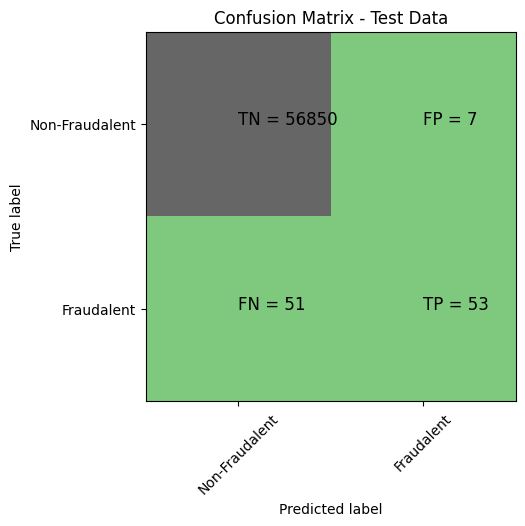

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.88      0.51      0.65       104

    accuracy                           1.00     56961
   macro avg       0.94      0.75      0.82     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9990519829356929
Confusion Matrix


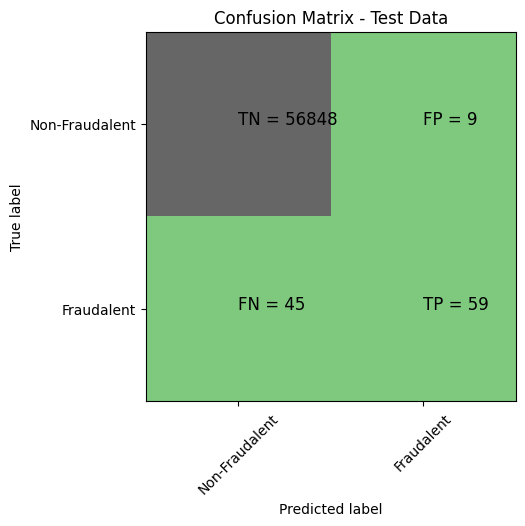

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.87      0.57      0.69       104

    accuracy                           1.00     56961
   macro avg       0.93      0.78      0.84     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.98433976061401
l2 threshold: 0.0012955266891995748
ROC for the test dataset 98.4%


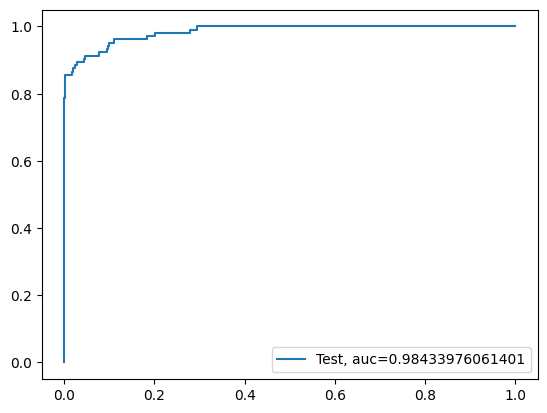

l1 roc_value: 0.8666367445453574
l1 threshold: 0.10801516477312392
ROC for the test dataset 86.7%


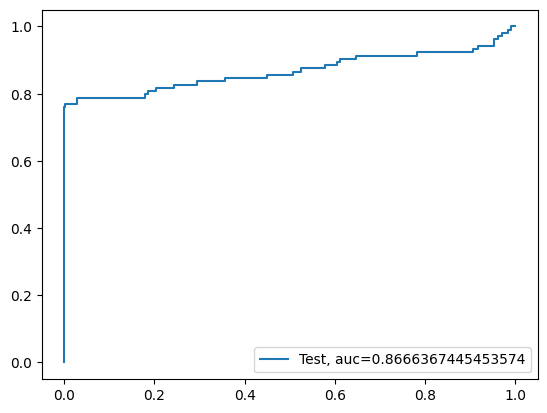

Time Taken by Model: --- 169.06788969039917 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9993328768806727
Confusion Matrix


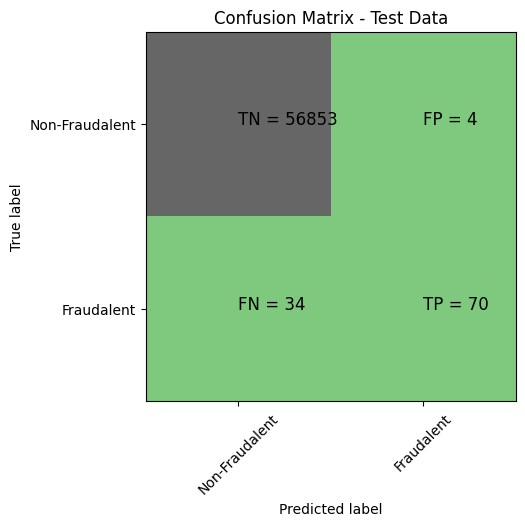

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.95      0.67      0.79       104

    accuracy                           1.00     56961
   macro avg       0.97      0.84      0.89     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8892911670439063
KNN threshold: 0.2
ROC for the test dataset 88.9%


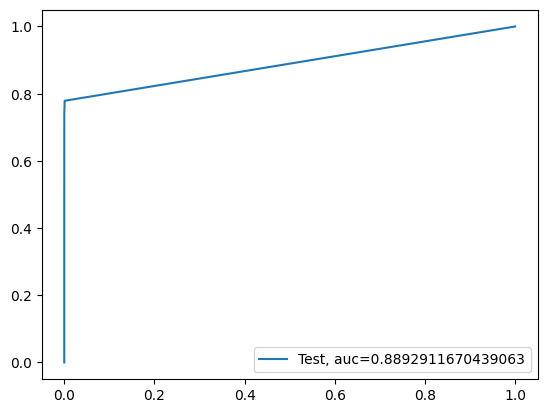

Time Taken by Model: --- 142.70927953720093 seconds ---
------------------------------------------------------------
Decision Tree Models with 'gini' & 'entropy' criteria
gini score: 0.9992099857797441
Confusion Matrix


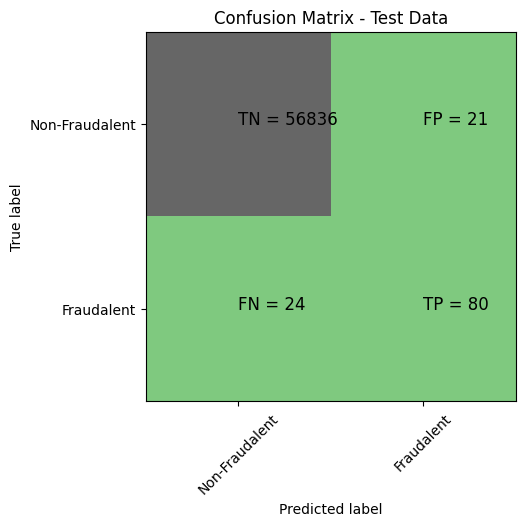

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.79      0.77      0.78       104

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8844307107845458
Tree threshold: 1.0
ROC for the test dataset 88.4%


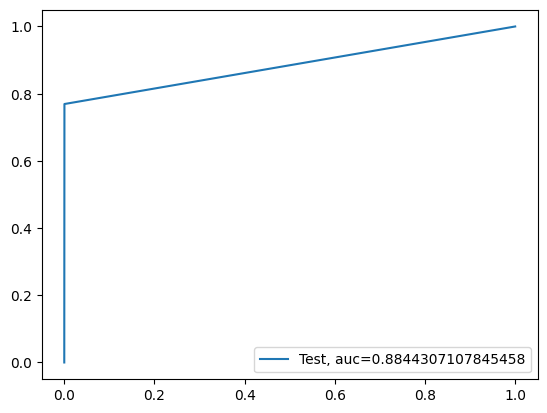

entropy score: 0.9992275416513052
Confusion Matrix


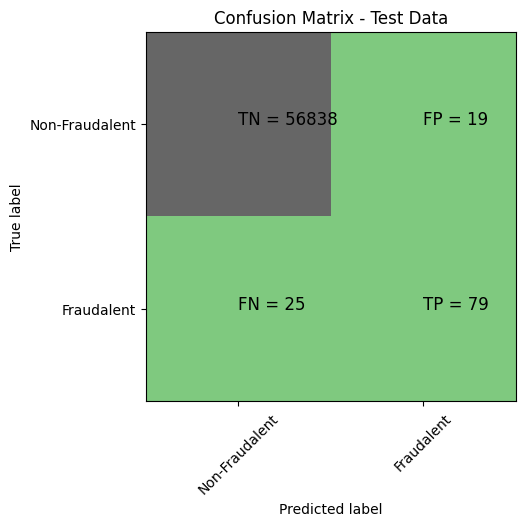

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.81      0.76      0.78       104

    accuracy                           1.00     56961
   macro avg       0.90      0.88      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.8796406064607429
Tree threshold: 1.0
ROC for the test dataset 88.0%


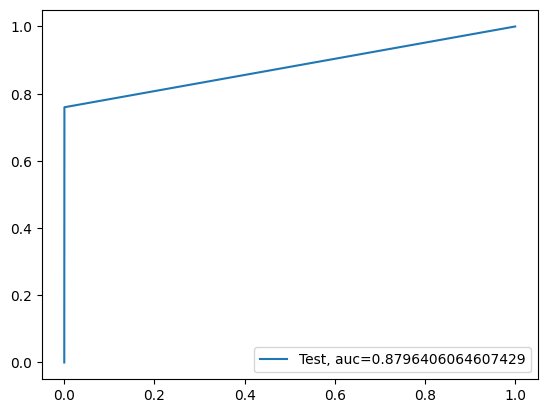

Time Taken by Model: --- 24.958848237991333 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


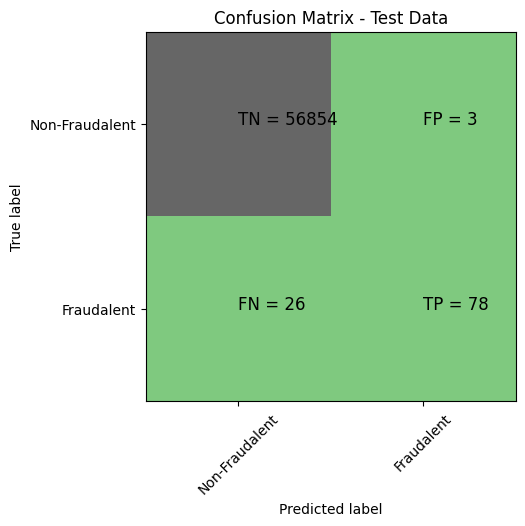

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.96      0.75      0.84       104

    accuracy                           1.00     56961
   macro avg       0.98      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: <function roc_curve at 0x7e578d076cb0>
Random Forest threshold: 0.03
ROC for the test dataset 94.1%


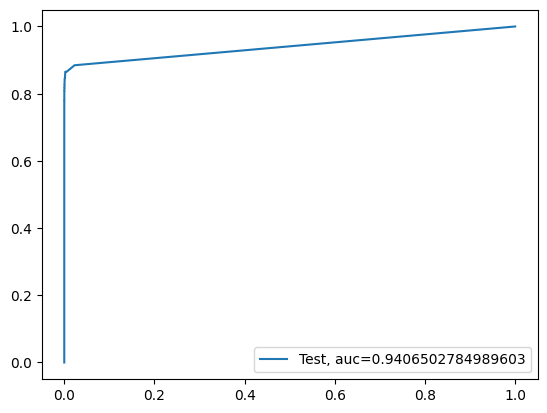

Time Taken by Model: --- 188.19087529182434 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


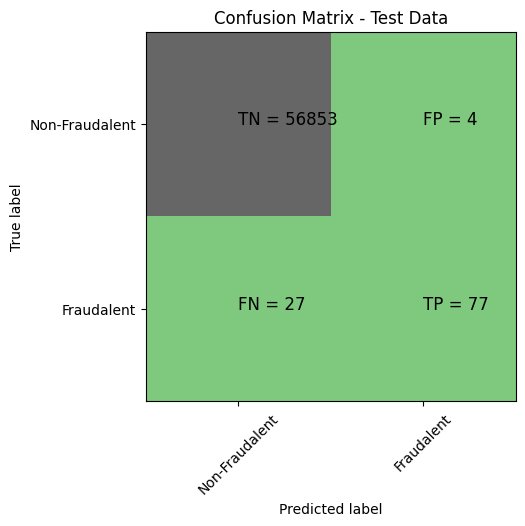

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.95      0.74      0.83       104

    accuracy                           1.00     56961
   macro avg       0.98      0.87      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9726689494967806
XGBoost threshold: 3.681866292026825e-05
ROC for the test dataset 97.3%


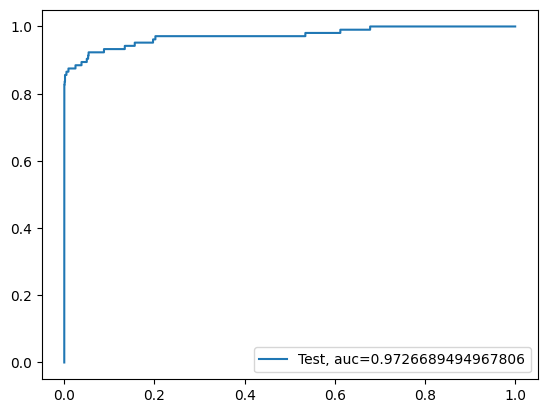

Time Taken by Model: --- 70.48076820373535 seconds ---
------------------------------------------------------------
SVM Model
accuracy_score : 0.9982093011007531
Confusion Matrix


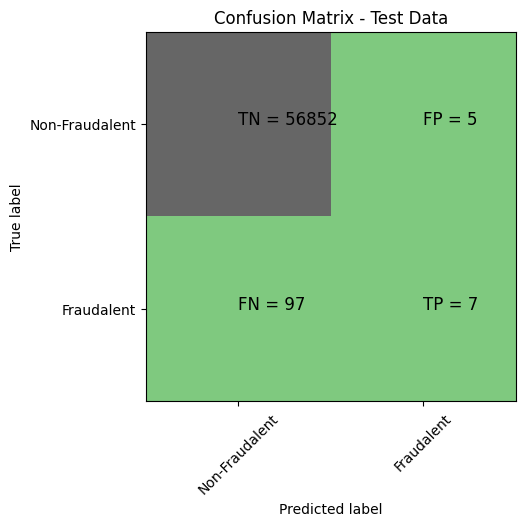

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.58      0.07      0.12       104

    accuracy                           1.00     56961
   macro avg       0.79      0.53      0.56     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.4915812747500139
SVM threshold: 0.002189323732629991
ROC for the test dataset 49.2%


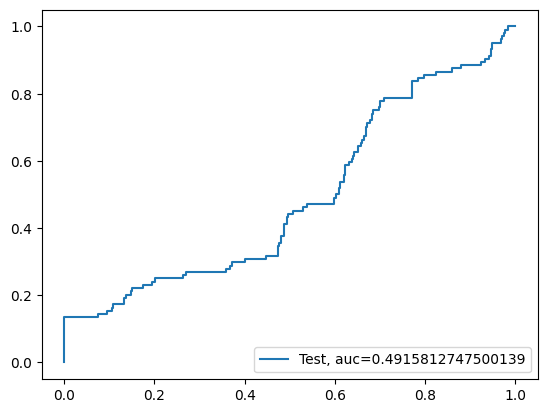

Time Taken by Model: --- 316.7094843387604 seconds ---
------------------------------------------------------------


In [28]:
# Run Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

# KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, "RepeatedKfold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

#Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

#XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)


#SVM Model
print("SVM Model")
start_time = time.time()
df_Results = BuildAndRunSVMModels(df_Results, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

In [29]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold,roc_vallue,threshhold,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998982,0.984340,0.001296,NaN,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.866637,0.108015,NaN,NaN,NaN
2,RepeatedKfold Cross Validation,KNN,0.999333,NaN,NaN,0.889291,0.2,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.884431,NaN,NaN,NaN,1.0
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999228,0.879641,NaN,NaN,NaN,1.0
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.940650,0.030000,NaN,NaN,NaN
6,RepeatedKFold Cross Validation,XGBoost,0.999456,0.972669,0.000037,NaN,NaN,NaN
7,RepeatedKFold Cross Validation,SVM,0.998209,0.491581,0.002189,NaN,NaN,NaN


Ressults for cross validation with RepeatedKFold:

Looking at accuracy and ROC


Cross Validation with StratifiedKFold

In [30]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state=None)
#X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
  print("TRAIN:", train_index, "Test:", test_index)
  X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284803 284804 284805] Test: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284803 284804 284805] Test: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284803 284804 284805] Test: [ 81186  81609  82400 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284803 284804 284805] Test: [150647 150654 150660 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] Test: [208651 212516 212644 ... 284803 284804 284805]


Logistic Regression with L1 and L2 Regularisation
Max auc_roc for l1: 0.964776110187797
Max auc_roc for l2: 0.98294748199688
Parameters for l1 regularisations
[[-0.03658685 -0.13590355 -0.20462422  0.04329546 -0.24032965  0.08418273
   0.12672906 -0.04821451 -0.142565   -0.13832143 -0.11681351  0.0552549
  -0.15630183 -0.24190218 -0.03138741 -0.09867557 -0.23094832  0.05617418
   0.02123063  0.20504431  0.09010364  0.00148218 -0.03800855 -0.00385193
  -0.14799427 -0.00698535 -0.06624233 -0.00677145 -0.00656481 -0.12982261]]
[-2.04091685]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.5066765 ,
        0.48032795, 0.49093253, 0.78483557, 0.85813423, 0.88748652,
        0.84580898, 0.84535651, 0.91388743, 0.89216117, 0.9120168 ,
        0.91435283, 0.85726678, 0.9063144 , 0.85173761, 0.96899813],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.57844261,
        0.58524797, 0.61356971, 0.86832681, 0.92471056, 0.94295055,
        0.92713717, 0.92914656, 0.94170299,

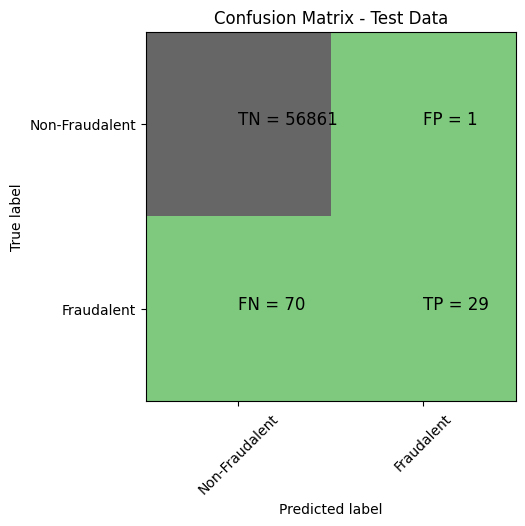

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.97      0.29      0.45        99

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9987359772475904
Confusion Matrix


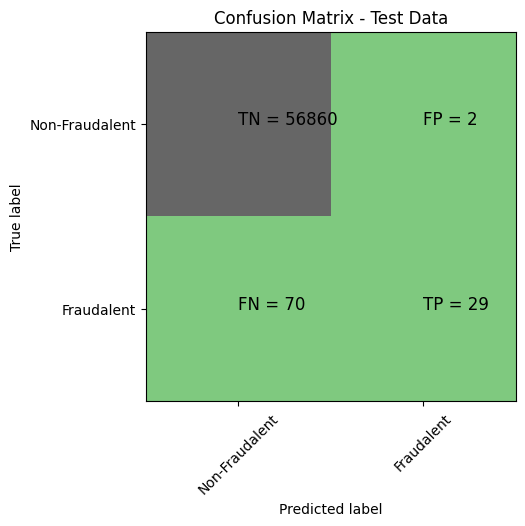

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.29      0.45        99

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9834341089485122
l2 threshold: 0.0015814406611271148
ROC for the test dataset 98.3%


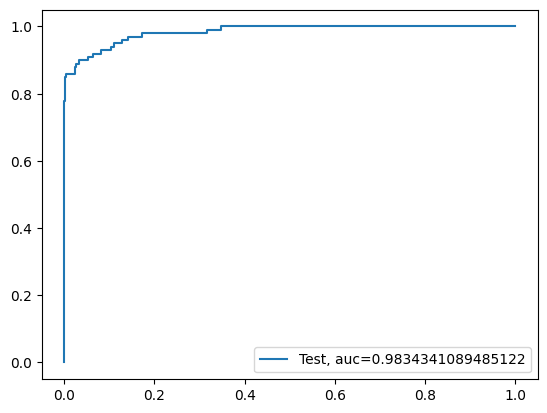

l1 roc_value: 0.8902066282038847
l1 threshold: 0.021085531626671927
ROC for the test dataset 89.0%


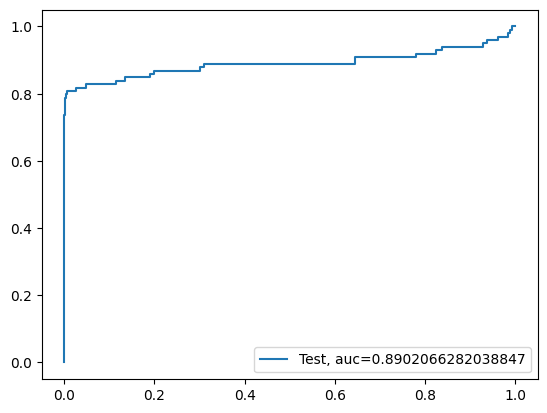

Time Taken by Model: --- 172.08384108543396 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


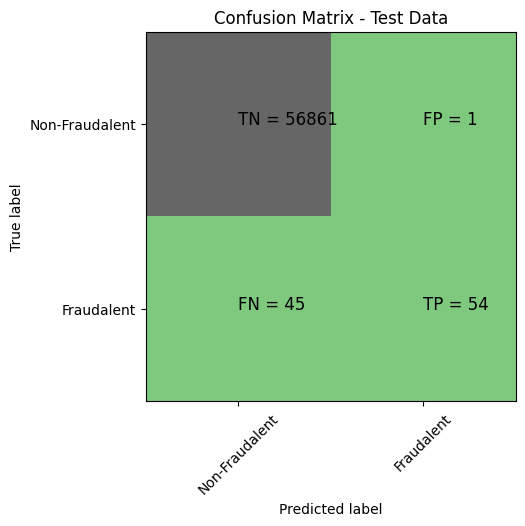

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.98      0.55      0.70        99

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8077078512606632
KNN threshold: 0.2
ROC for the test dataset 80.8%


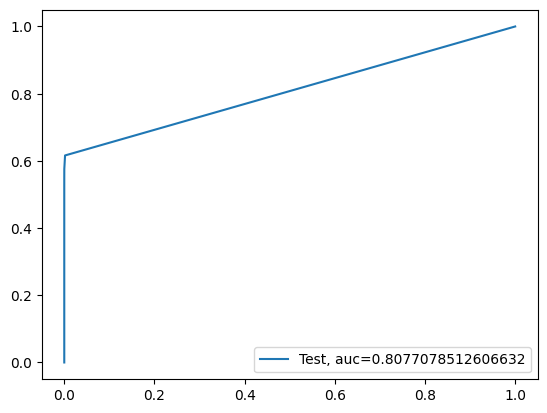

Time Taken by Model: --- 143.27701687812805 seconds ---
------------------------------------------------------------
Decision Tree Models with gini & entropy criteria
gini score: 0.998841312476958
Confusion Matrix


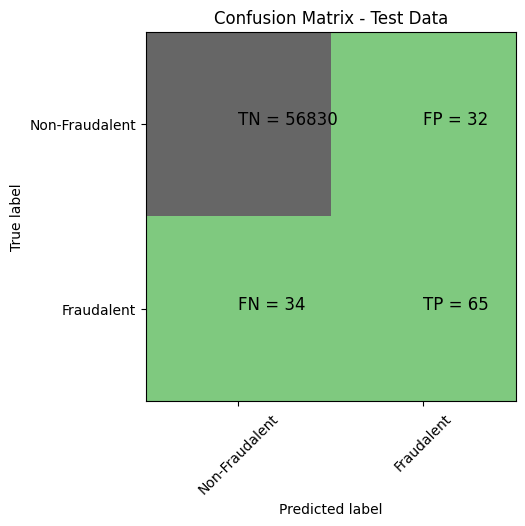

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.67      0.66      0.66        99

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8280014452853959
Tree threshold: 1.0
ROC for the test dataset 82.8%


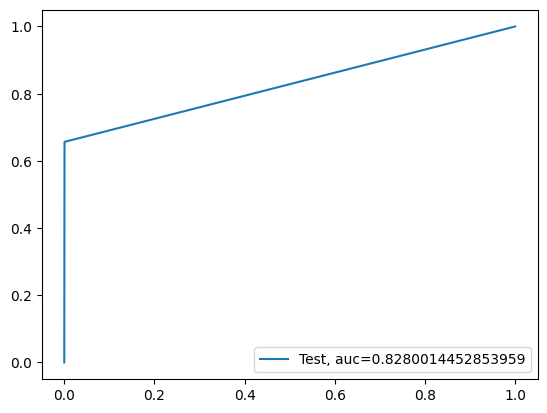

entropy score: 0.9990168711925703
Confusion Matrix


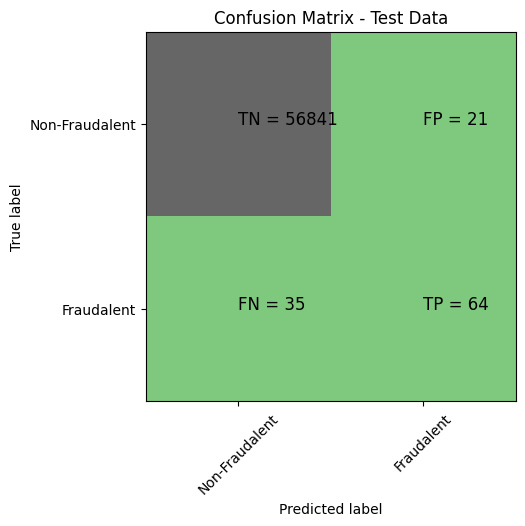

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.75      0.65      0.70        99

    accuracy                           1.00     56961
   macro avg       0.88      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.8230476656402583
Tree threshold: 1.0
ROC for the test dataset 82.3%


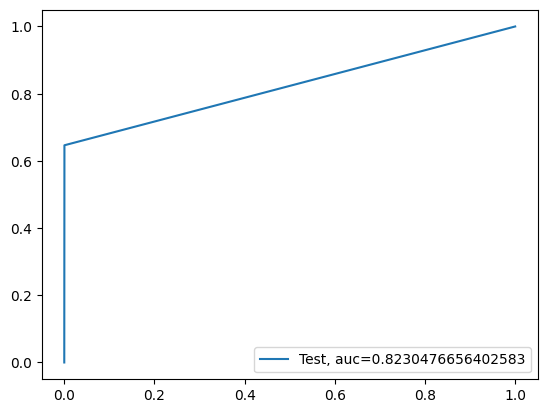

Time Taken by Model: --- 28.765546083450317 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


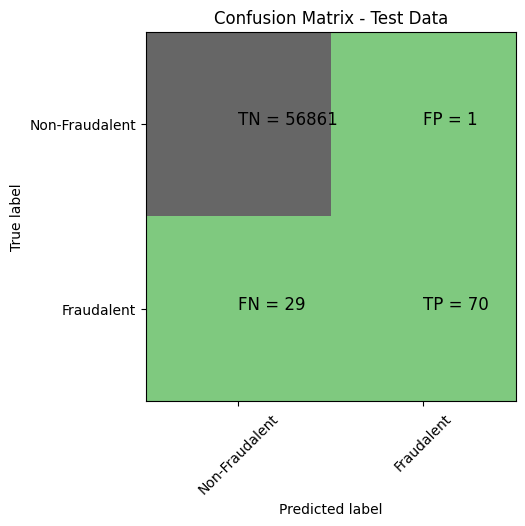

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.99      0.71      0.82        99

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: <function roc_curve at 0x7e578d076cb0>
Random Forest threshold: 0.01
ROC for the test dataset 94.7%


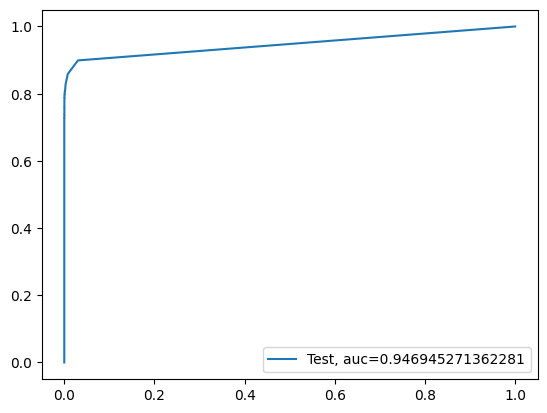

Time Taken by Model: --- 188.56405234336853 seconds ---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


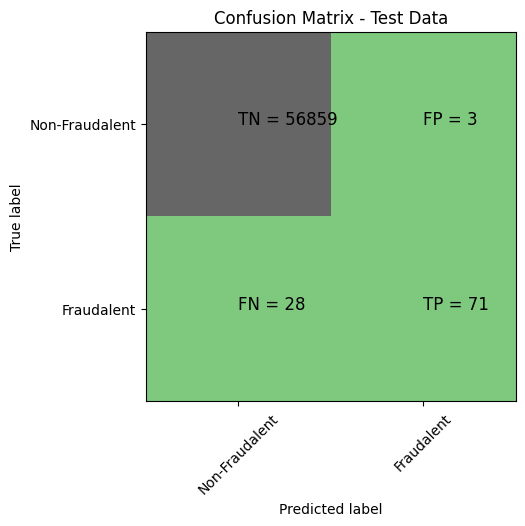

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.96      0.72      0.82        99

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9837401840145324
XGBoost threshold: 5.109538324177265e-05
ROC for the test dataset 98.4%


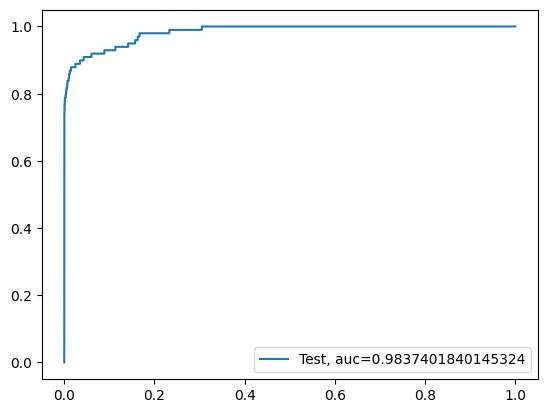

Time Taken by Model: --- 72.58757901191711 seconds ---
------------------------------------------------------------
SVM Model with SIgmoid Kernal
accuracy_score : 0.9982619687154369
Confusion Matrix


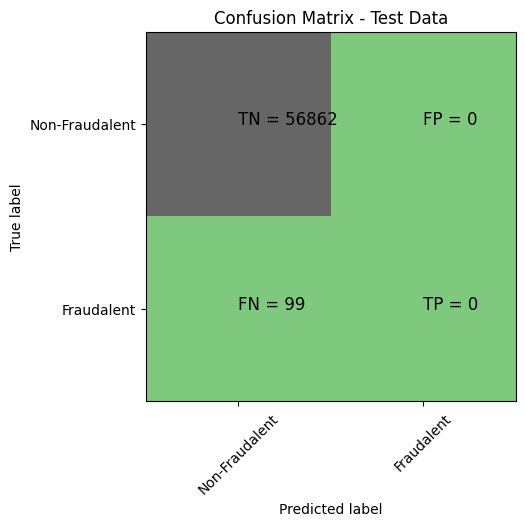

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.00      0.00      0.00        99

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.40628578351486444
SVM threshold: 0.002165811406782044
ROC for the test dataset 40.6%


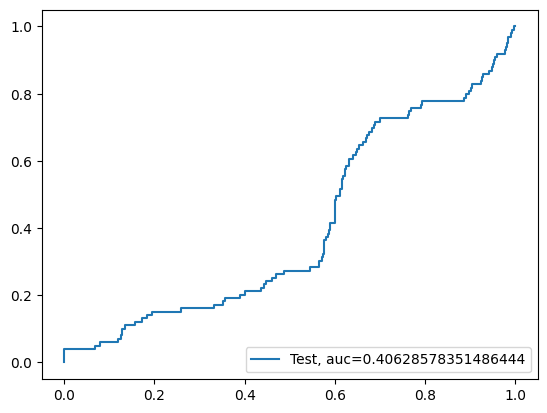

Time Taken by Model: --- 297.82273983955383 seconds ---
------------------------------------------------------------


In [31]:
#Logistic Regression with L1 and L2 Regularisation
print("Logistic Regression with L1 and L2 Regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

#KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

#Run Decision Tree Models with 'gini' & 'entropy' criteria
print("Decision Tree Models with gini & entropy criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

#Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

#SVM model with Sigmoid Kernel
print("SVM Model with SIgmoid Kernal")
start_time = time.time()
df_Results = BuildAndRunSVMModels(df_Results,"StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Taken by Model: --- %s seconds ---"%(time.time()-start_time))
print('-'*60)

In [32]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold,roc_vallue,threshhold,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998982,0.984340,0.001296,NaN,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.866637,0.108015,NaN,NaN,NaN
2,RepeatedKfold Cross Validation,KNN,0.999333,NaN,NaN,0.889291,0.2,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.884431,NaN,NaN,NaN,1.0
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999228,0.879641,NaN,NaN,NaN,1.0
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.940650,0.030000,NaN,NaN,NaN
6,RepeatedKFold Cross Validation,XGBoost,0.999456,0.972669,0.000037,NaN,NaN,NaN
7,RepeatedKFold Cross Validation,SVM,0.998209,0.491581,0.002189,NaN,NaN,NaN


In [35]:
# proceeding with the model that showed the best resutl

# Logistic Regression
from sklearn import linear_model
from sklearn.model_selection import KFold
num_C = list(np.power(10.0, np.arange(-10,10)))
cv_num = KFold(n_splits = 10, shuffle = True, random_state=42)

clf = linear_model.LogisticRegressionCV(
    Cs=num_C,
    penalty='l2',
    scoring='roc_auc',
    cv=cv_num,
    random_state=42,
    max_iter=10000,
    fit_intercept=True,
    solver='newton-cg',
    tol=10
)
clf.fit(X_train_SKF_cv, y_train_SKF_cv)
print('Max auc_roc for l2:', clf.scores_[1].mean(axis=0).max())

print("Parameters for l2 regularisations")
print(clf.coef_)
print(clf.intercept_)
print(clf.scores_)

y_pred_l2 = clf.predict(X_test)

#find predicted probabilities

y_pred_probs_l2 = clf.predict_proba(X_test)[:,1]

Accuracy_l2 = metrics.accuracy_score(y_pred = y_pred_l2, y_true=y_test)

print("Accuracy of Logistic model with l2 regularisation: {0}".format(Accuracy_l2))

from sklearn.metrics import roc_auc_score

l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}".format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))


Max auc_roc for l2: 0.98294748199688
Parameters for l2 regularisations
[[ 0.00582718  0.06281192 -0.06680247  0.21937169  0.05387127 -0.03276128
  -0.02278344 -0.11512252 -0.06961506 -0.16317636  0.12824944 -0.19251412
  -0.03602123 -0.35991996  0.00295444 -0.08665558 -0.07192515  0.00087424
   0.00438937 -0.02825673  0.03844252  0.02362463 -0.01178183 -0.00965589
  -0.00669833  0.00643726 -0.0108594  -0.00199643  0.00040251  0.00199209]]
[-7.45736644]
{1: array([[0.63651889, 0.63840891, 0.65440045, 0.76906897, 0.89476869,
        0.94046286, 0.98556107, 0.99055504, 0.98324056, 0.97577223,
        0.97577223, 0.97577223, 0.97577223, 0.97577223, 0.97577223,
        0.97577223, 0.97577223, 0.97577223, 0.97577223, 0.97577223],
       [0.59387099, 0.5956186 , 0.61816269, 0.77300988, 0.91533235,
        0.95011893, 0.96345559, 0.98171194, 0.98391256, 0.98098999,
        0.98098999, 0.98098999, 0.98098999, 0.98098999, 0.98098999,
        0.98098999, 0.98098999, 0.98098999, 0.98098999, 0.9809

In [36]:
clf.coef_

array([[ 0.00582718,  0.06281192, -0.06680247,  0.21937169,  0.05387127,
        -0.03276128, -0.02278344, -0.11512252, -0.06961506, -0.16317636,
         0.12824944, -0.19251412, -0.03602123, -0.35991996,  0.00295444,
        -0.08665558, -0.07192515,  0.00087424,  0.00438937, -0.02825673,
         0.03844252,  0.02362463, -0.01178183, -0.00965589, -0.00669833,
         0.00643726, -0.0108594 , -0.00199643,  0.00040251,  0.00199209]])

In [46]:
coefficients = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coefficients.columns = ['Feature',"Importance Coefficient"]

In [47]:
coefficients

,Feature,Importance Coefficient
0,V1,0.005827
1,V2,0.062812
2,V3,-0.066802
3,V4,0.219372
4,V5,0.053871
5,V6,-0.032761
6,V7,-0.022783
7,V8,-0.115123
8,V9,-0.069615
9,V10,-0.163176


Showing which features are most prominent in the dataset

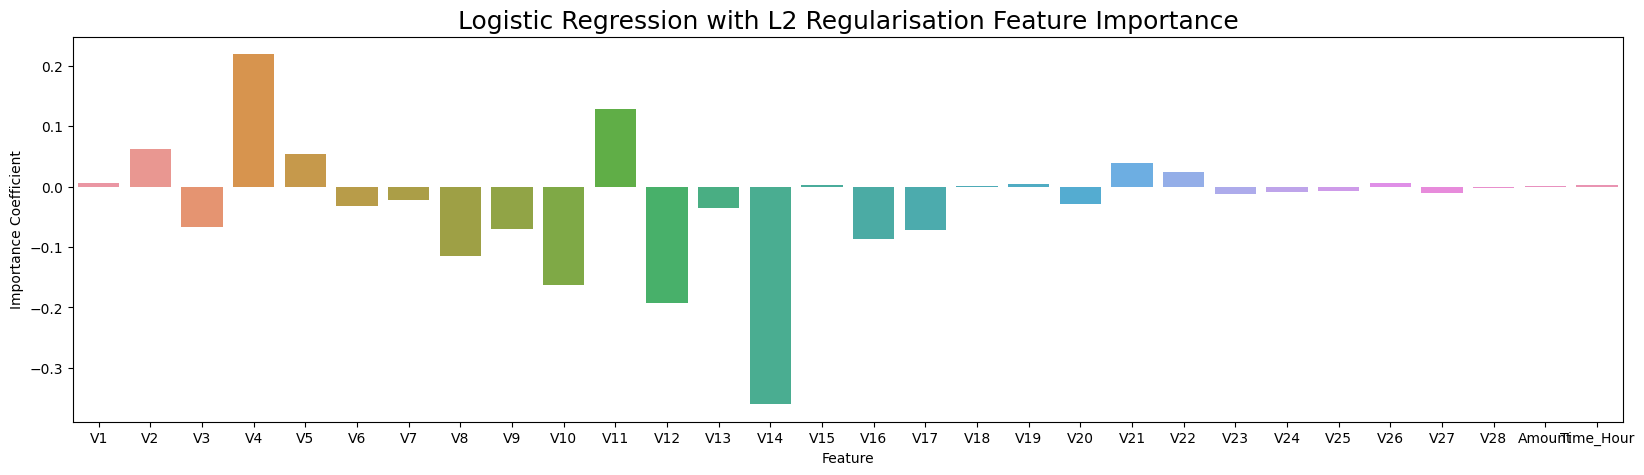

In [48]:
plt.figure(figsize = (20,5))
sns.barplot(x ='Feature', y='Importance Coefficient', data = coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize = 18)
plt.show()

V4, V5, V11 has + importance. V10, V12, V14 seems to have - impact on the predictions

Model Building with balancing Classes

Randopm Oversample

SMOTE

ADASYN

Oversampling with RandomOverSample with StratifiedKfold Cross Validation

In [51]:
from sklearn.model_selection import StratifiedGroupKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  ROS = RandomOverSampler(sampling_strategy=0.5)
  X_over, y_over = ROS.fit_resample(X_train, y_train)

X_over = pd.DataFrame(data=X_over, columns =cols)

Logistic Regression with L1 and L2 regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9864728689926634
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

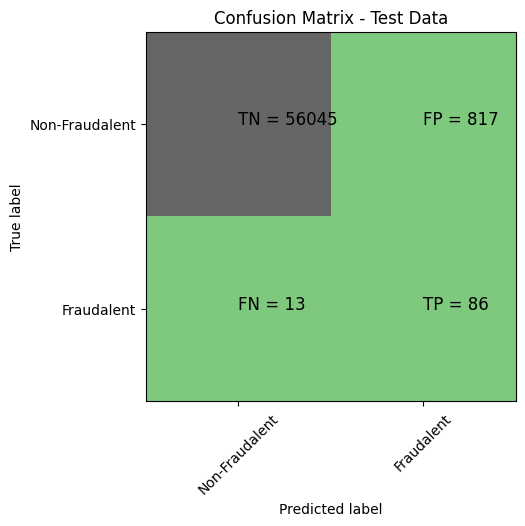

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56862
           1       0.10      0.87      0.17        99

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy of Logistic model with l1 regularisation : 0.9982619687154369
Confusion Matrix


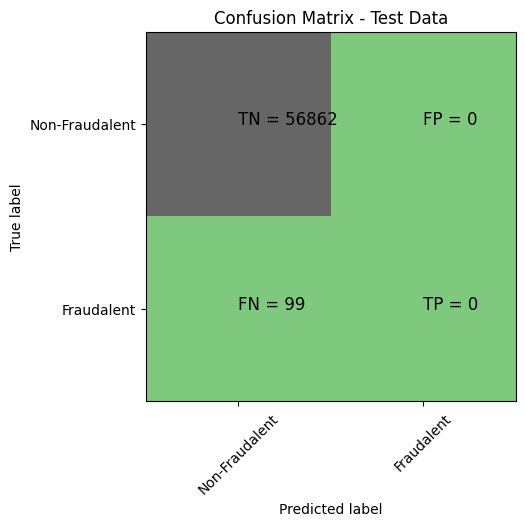

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.00      0.00      0.00        99

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9810627821601758
l2 threshold: 0.337587840718516
ROC for the test dataset 98.1%


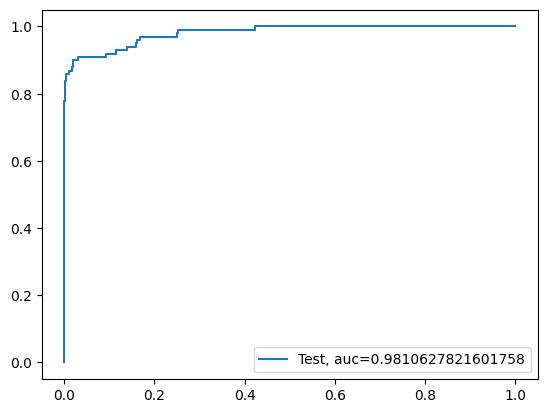

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


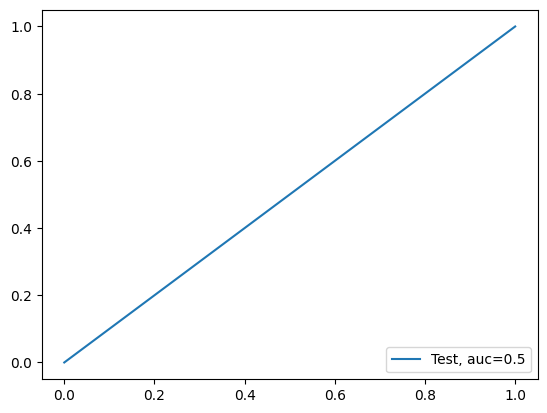

Time Taken by Model: ---239.68175745010376 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


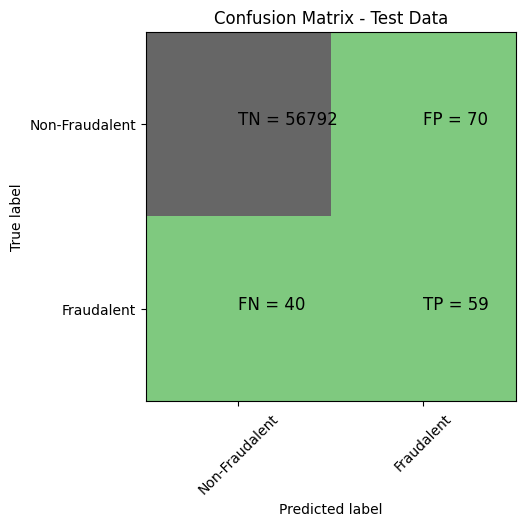

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.46      0.60      0.52        99

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8075609423346048
KNN threshold: 0.2
ROC for the test dataset 80.8%


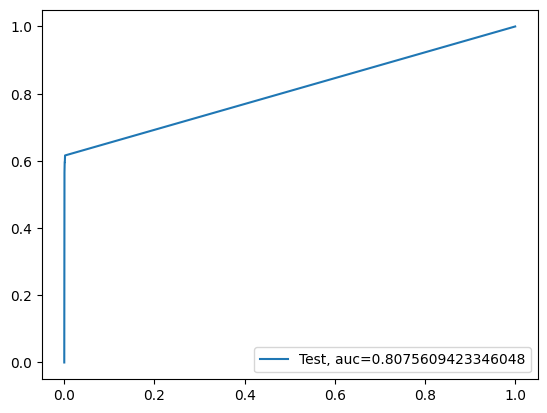

Time Taken by Model: ---211.7483184337616 seconds ---
------------------------------------------------------------
Decision TRee Models with 'gini' & 'entropy' criteria
gini score: 0.9991222064219378
Confusion Matrix


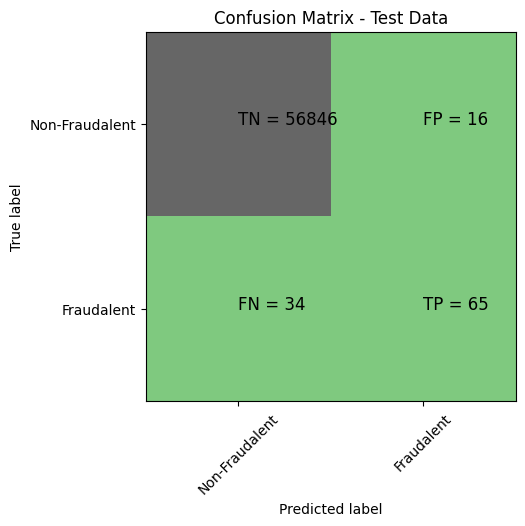

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.80      0.66      0.72        99

    accuracy                           1.00     56961
   macro avg       0.90      0.83      0.86     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8281421367841121
Tree threshold: 1.0
ROC for the test dataset 82.8%


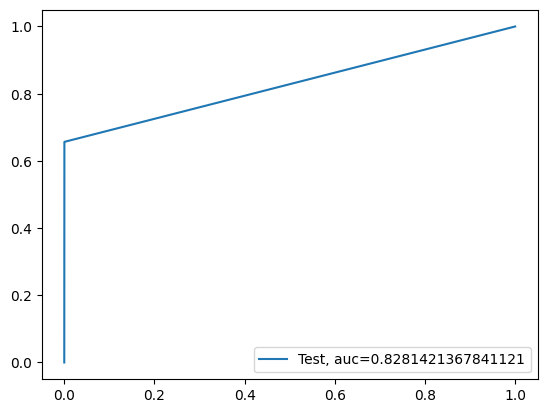

entropy score: 0.9992275416513052
Confusion Matrix


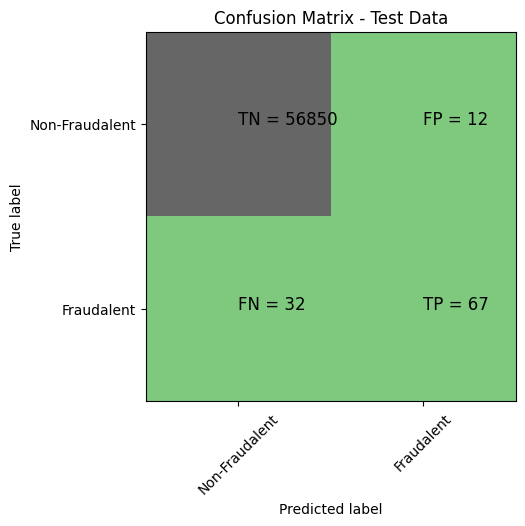

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.85      0.68      0.75        99

    accuracy                           1.00     56961
   macro avg       0.92      0.84      0.88     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.8382783197598014
Tree threshold: 1.0
ROC for the test dataset 83.8%


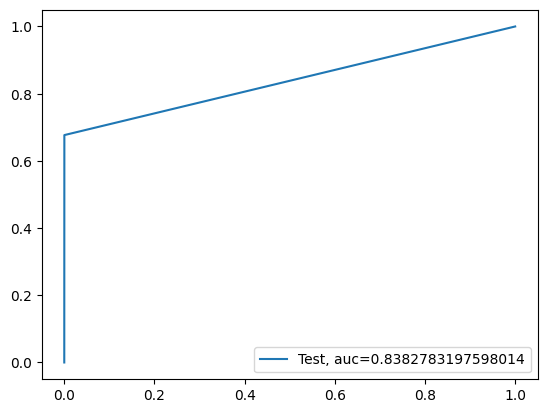

Time Taken by Model: ---24.499778032302856 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


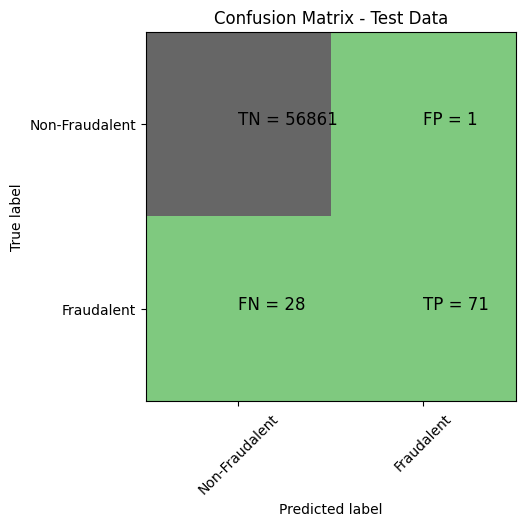

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.99      0.72      0.83        99

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: <function roc_curve at 0x7e578d076cb0>
Random Forest threshold: 0.02
ROC for the test dataset 93.6%


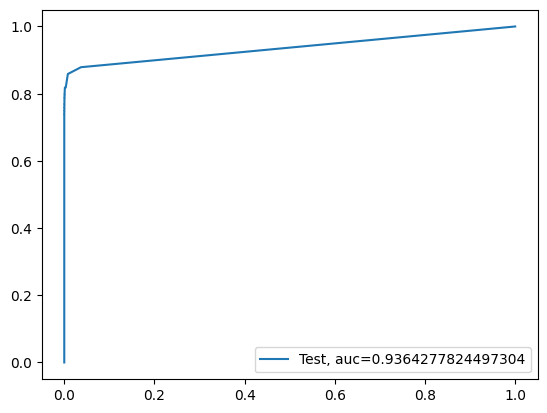

Time Taken by Model: ---148.49174332618713 seconds ---
------------------------------------------------------------
Run XGBoost Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


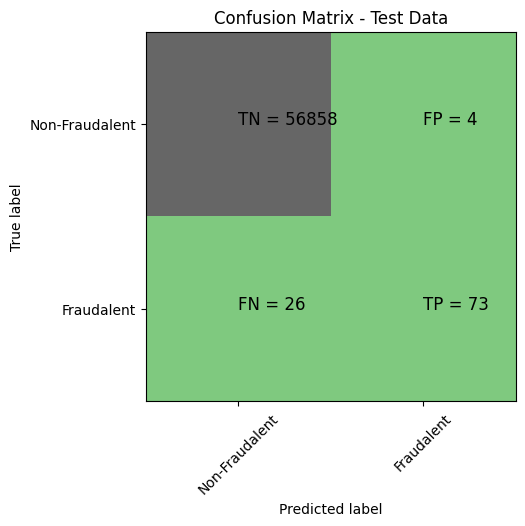

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.95      0.74      0.83        99

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9840796555474196
XGBoost threshold: 9.890597721096128e-05
ROC for the test dataset 98.4%


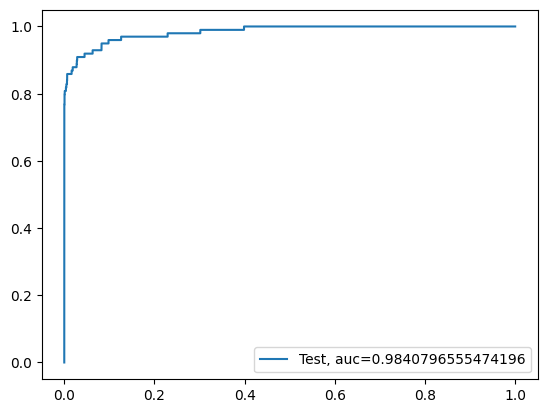

Time Taken by Model: ---95.0322265625 seconds ---
------------------------------------------------------------


In [52]:
Data_Imbalance_Handling = "Random Oversampling with StratifiedKFold CV"
#Run Logistic Regression with L1 and L2 Regularisation

print("Logistic Regression with L1 and L2 regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run Decision Tree with 'gini' & 'entropy' criteria
print("Decision TRee Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run XGBoost Model
print("Run XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_over, y_over, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)


In [53]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold,roc_vallue,threshhold,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998982,0.984340,0.001296,NaN,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.866637,0.108015,NaN,NaN,NaN
2,RepeatedKfold Cross Validation,KNN,0.999333,NaN,NaN,0.889291,0.2,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.884431,NaN,NaN,NaN,1.0
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999228,0.879641,NaN,NaN,NaN,1.0
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.940650,0.030000,NaN,NaN,NaN
6,RepeatedKFold Cross Validation,XGBoost,0.999456,0.972669,0.000037,NaN,NaN,NaN
7,RepeatedKFold Cross Validation,SVM,0.998209,0.491581,0.002189,NaN,NaN,NaN
8,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.985429,0.981063,0.337588,NaN,NaN,NaN
9,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998262,0.500000,1.500000,NaN,NaN,NaN


Oversampling with SMOTE

In [60]:
from imblearn import over_sampling
from sklearn.model_selection import StratifiedGroupKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  SMOTE  = over_sampling.SMOTE(sampling_strategy=0.5)
  X_train_Smote, y_train_Smote = SMOTE.fit_resample(X_train, y_train)

X_train_Smote = pd.DataFrame(data=X_train_Smote, columns =cols)

Logistic Regression with L1 and L2 regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9923875702358018
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

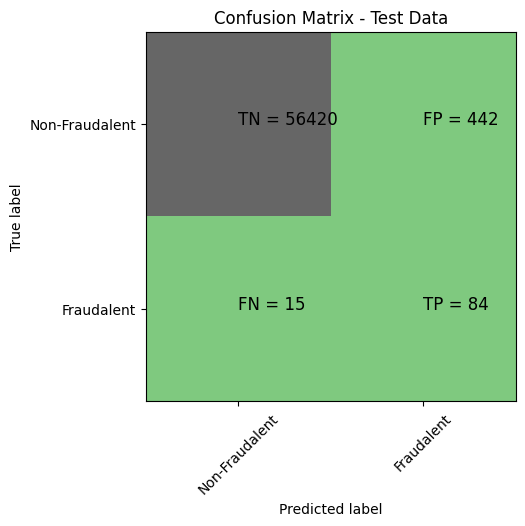

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56862
           1       0.16      0.85      0.27        99

    accuracy                           0.99     56961
   macro avg       0.58      0.92      0.63     56961
weighted avg       1.00      0.99      0.99     56961

Accuracy of Logistic model with l1 regularisation : 0.9982619687154369
Confusion Matrix


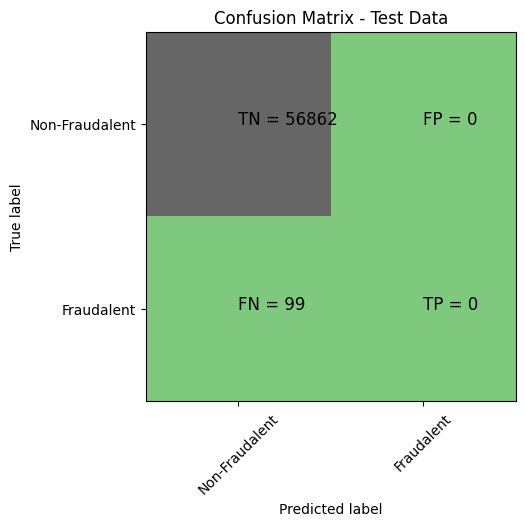

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.00      0.00      0.00        99

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9747320199995098
l2 threshold: 0.23147775323553937
ROC for the test dataset 97.5%


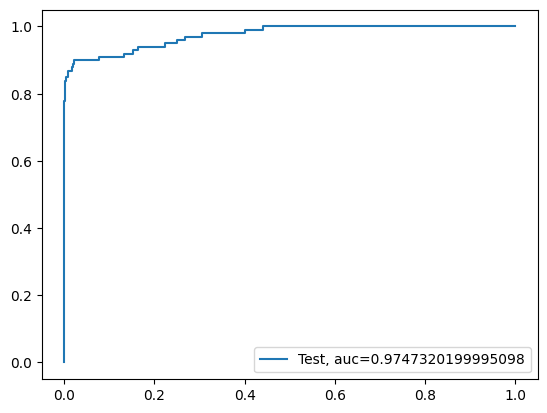

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


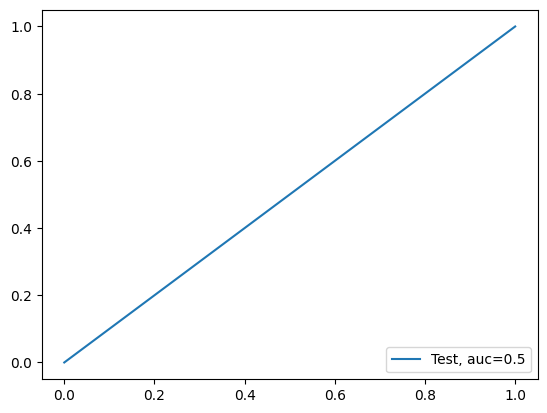

Time Taken by Model: ---255.1372742652893 seconds ---
------------------------------------------------------------
KNN Model
model score
0.994961464861923
Confusion Matrix


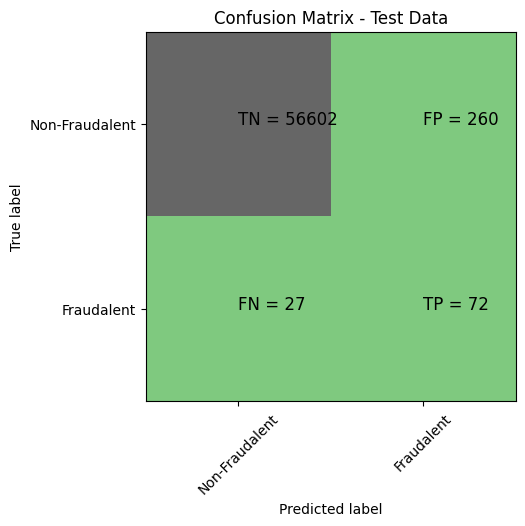

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.22      0.73      0.33        99

    accuracy                           0.99     56961
   macro avg       0.61      0.86      0.67     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.861731432719087
KNN threshold: 0.6
ROC for the test dataset 86.2%


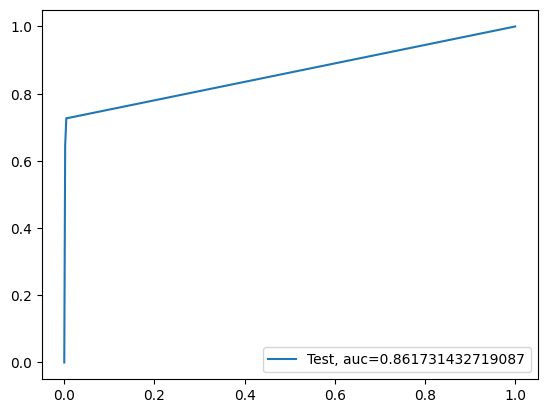

Time Taken by Model: ---211.99126982688904 seconds ---
------------------------------------------------------------
Decision TRee Models with 'gini' & 'entropy' criteria
gini score: 0.997191060550201
Confusion Matrix


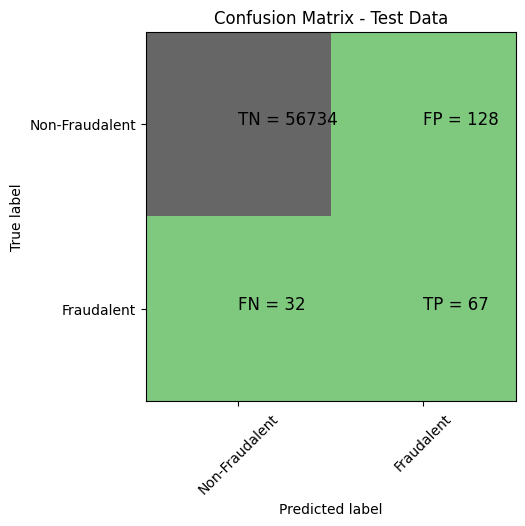

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.34      0.68      0.46        99

    accuracy                           1.00     56961
   macro avg       0.67      0.84      0.73     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8372583063941089
Tree threshold: 1.0
ROC for the test dataset 83.7%


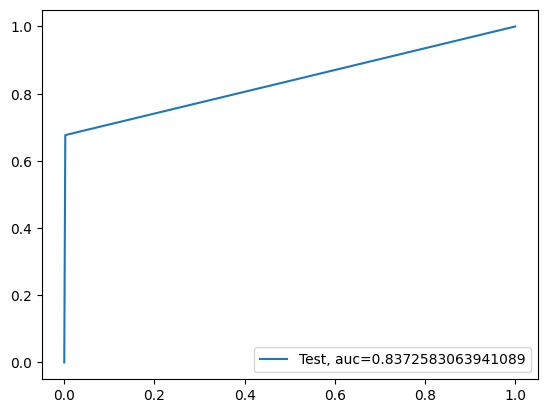

entropy score: 0.997120837063956
Confusion Matrix


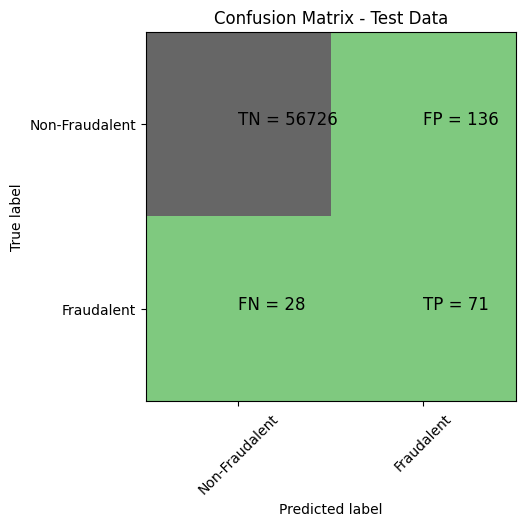

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.34      0.72      0.46        99

    accuracy                           1.00     56961
   macro avg       0.67      0.86      0.73     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.8573899808467709
Tree threshold: 1.0
ROC for the test dataset 85.7%


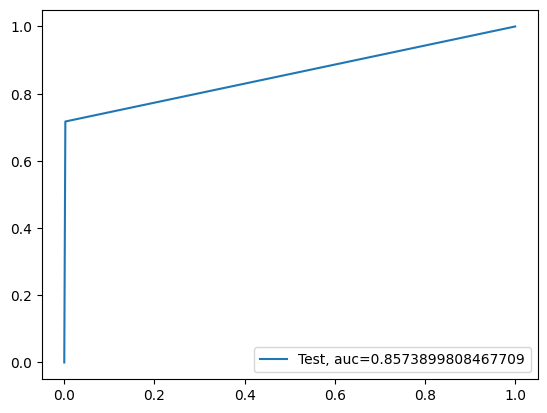

Time Taken by Model: ---38.551913022994995 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


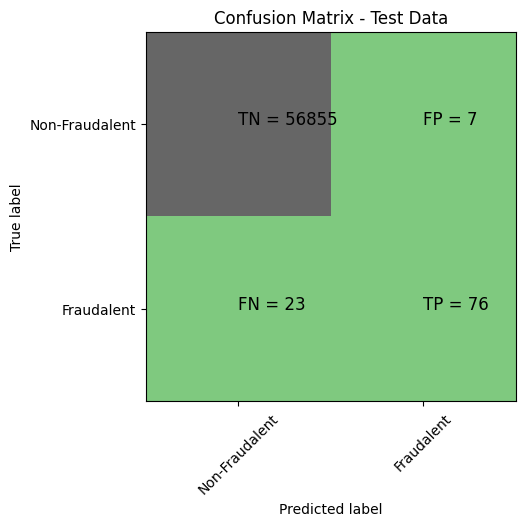

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.92      0.77      0.84        99

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: <function roc_curve at 0x7e578d076cb0>
Random Forest threshold: 0.04
ROC for the test dataset 95.5%


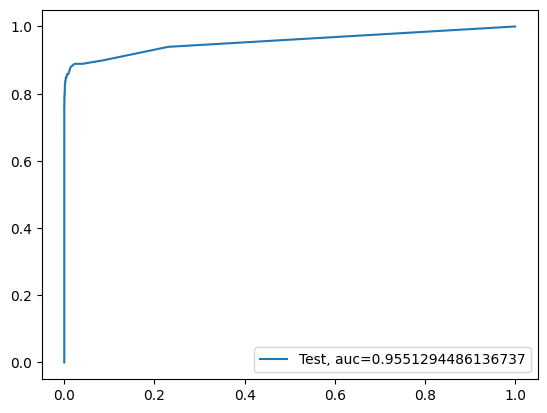

Time Taken by Model: ---232.53125643730164 seconds ---
------------------------------------------------------------
Run XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


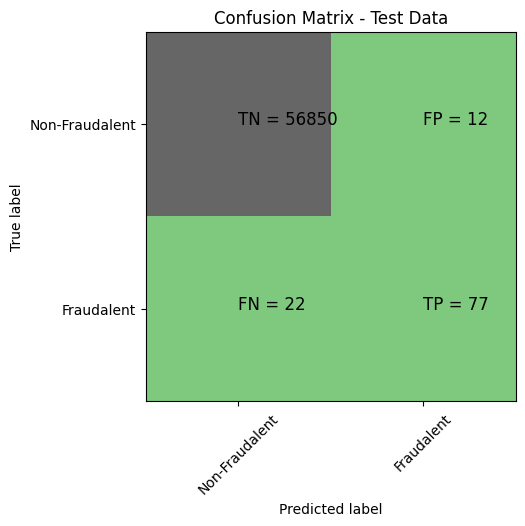

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.87      0.78      0.82        99

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9764581554705011
XGBoost threshold: 9.558712190482765e-05
ROC for the test dataset 97.6%


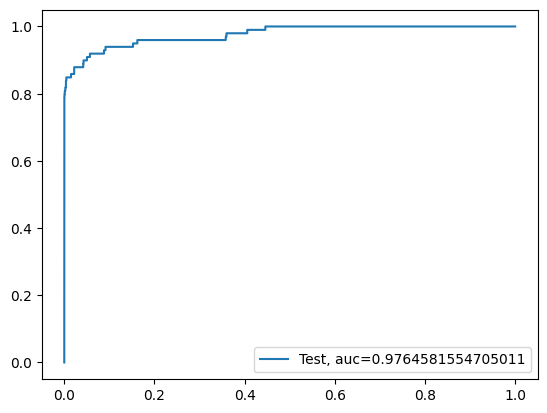

Time Taken by Model: ---139.41182231903076 seconds ---
------------------------------------------------------------


In [61]:
Data_Imbalance_Handling = "SMOTE Oversampling with StratifiedKFold CV"
#Run Logistic Regression with L1 and L2 Regularisation

print("Logistic Regression with L1 and L2 regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run Decision Tree with 'gini' & 'entropy' criteria
print("Decision TRee Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run XGBoost Model
print("Run XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)


In [64]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold,roc_vallue,threshhold,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998982,0.984340,0.001296,NaN,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.866637,0.108015,NaN,NaN,NaN
2,RepeatedKfold Cross Validation,KNN,0.999333,NaN,NaN,0.889291,0.2,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.884431,NaN,NaN,NaN,1.0
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999228,0.879641,NaN,NaN,NaN,1.0
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.940650,0.030000,NaN,NaN,NaN
6,RepeatedKFold Cross Validation,XGBoost,0.999456,0.972669,0.000037,NaN,NaN,NaN
7,RepeatedKFold Cross Validation,SVM,0.998209,0.491581,0.002189,NaN,NaN,NaN
8,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.985429,0.981063,0.337588,NaN,NaN,NaN
9,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998262,0.500000,1.500000,NaN,NaN,NaN


Oversampling with ADASYN

In [65]:
from sklearn.model_selection import StratifiedGroupKFold
from imblearn.over_sampling import RandomOverSampler

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
  X_train = X.loc[train_index]
  y_train = y.loc[train_index]
  X_test = X.loc[test_index]
  y_test = y.loc[test_index]
  ADASYN  = over_sampling.ADASYN(sampling_strategy=0.5)
  X_train_ADASYN, y_train_ADASYN = ADASYN.fit_resample(X_train, y_train)

X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN, columns =cols)

Logistic Regression with L1 and L2 regularisation
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.9816543601233155
Parameters for l1 regularisations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

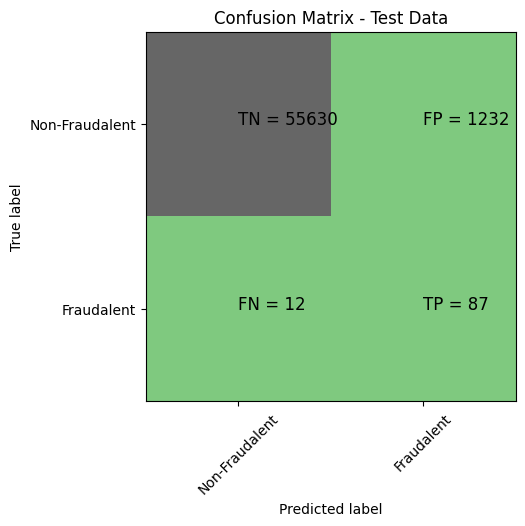

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56862
           1       0.07      0.88      0.12        99

    accuracy                           0.98     56961
   macro avg       0.53      0.93      0.56     56961
weighted avg       1.00      0.98      0.99     56961

Accuracy of Logistic model with l1 regularisation : 0.9982619687154369
Confusion Matrix


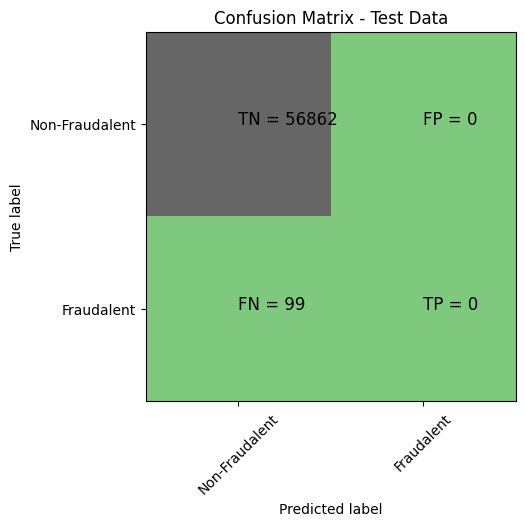

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.00      0.00      0.00        99

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9754427607651202
l2 threshold: 0.48935931528787574
ROC for the test dataset 97.5%


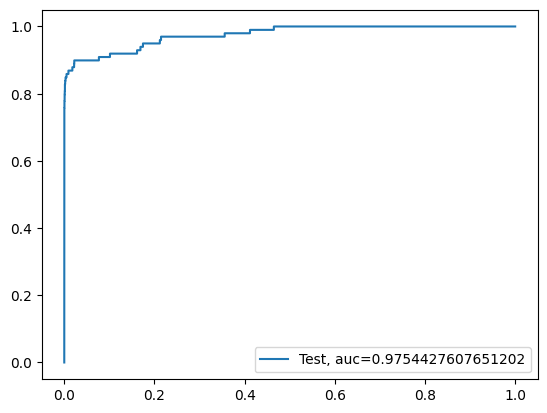

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


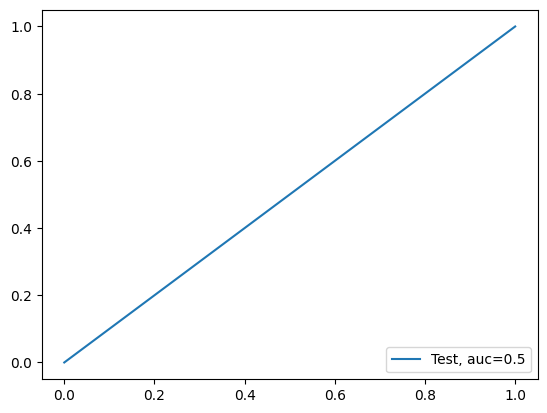

Time Taken by Model: ---230.95110893249512 seconds ---
------------------------------------------------------------
KNN Model
model score
0.9946454591738206
Confusion Matrix


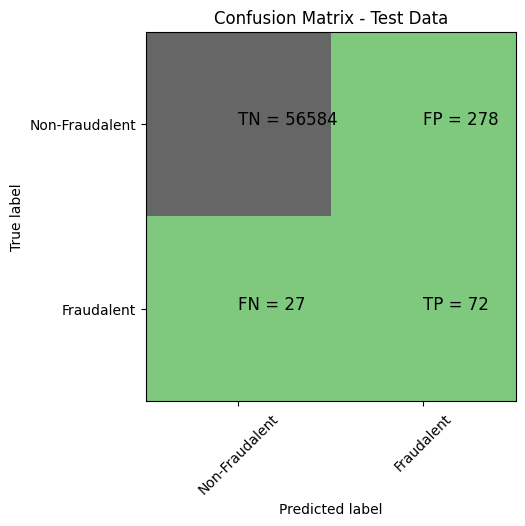

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.21      0.73      0.32        99

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8616339967505948
KNN threshold: 0.6
ROC for the test dataset 86.2%


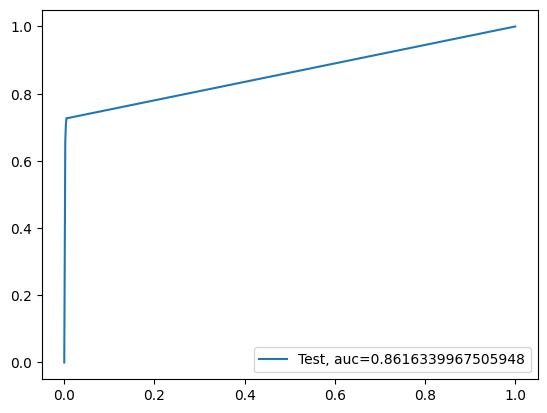

Time Taken by Model: ---211.99058747291565 seconds ---
------------------------------------------------------------
Decision TRee Models with 'gini' & 'entropy' criteria
gini score: 0.9976475132107934
Confusion Matrix


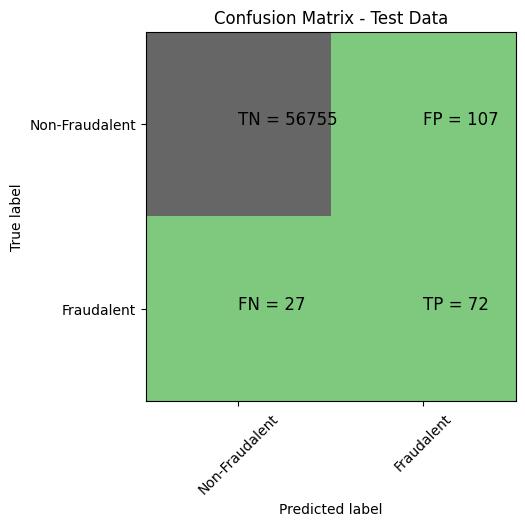

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.40      0.73      0.52        99

    accuracy                           1.00     56961
   macro avg       0.70      0.86      0.76     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value:0.8626954892386991
Tree threshold: 1.0
ROC for the test dataset 86.3%


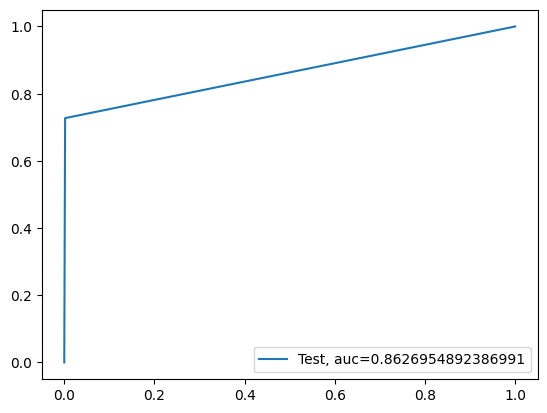

entropy score: 0.9979284071557732
Confusion Matrix


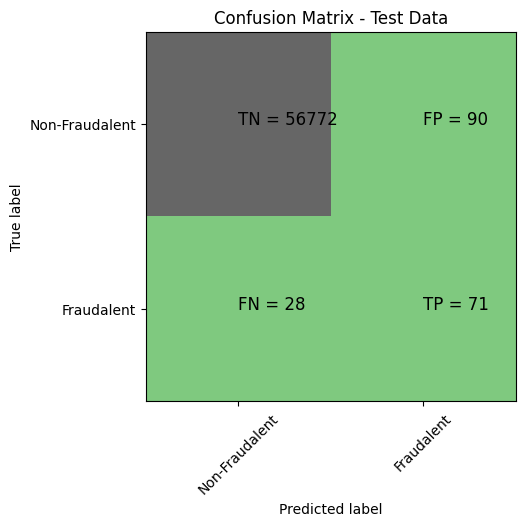

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.44      0.72      0.55        99

    accuracy                           1.00     56961
   macro avg       0.72      0.86      0.77     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value:0.85779446890558
Tree threshold: 1.0
ROC for the test dataset 85.8%


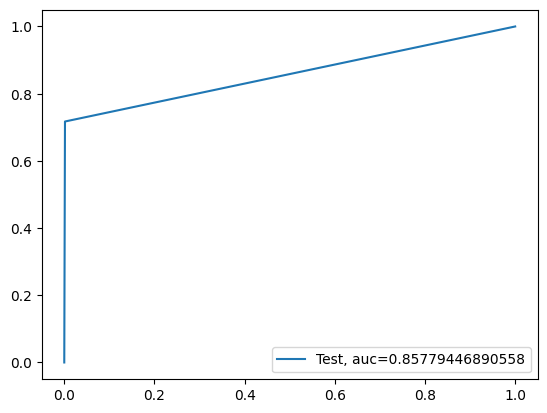

Time Taken by Model: ---39.83517789840698 seconds ---
------------------------------------------------------------
Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


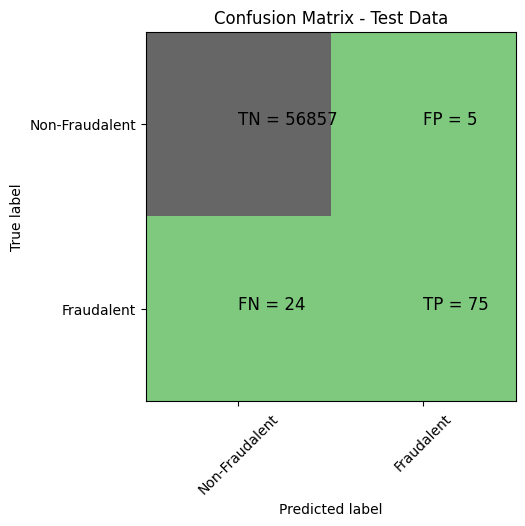

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.94      0.76      0.84        99

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: <function roc_curve at 0x7e578d076cb0>
Random Forest threshold: 0.04
ROC for the test dataset 95.9%


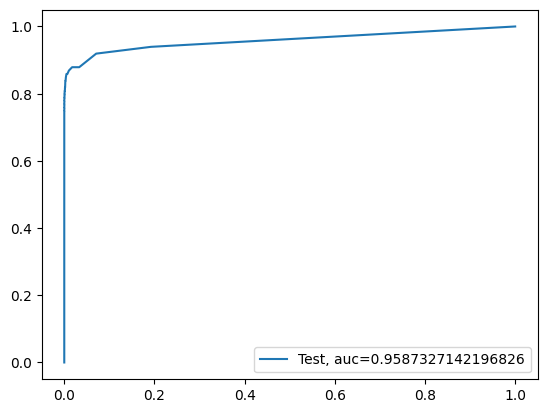

Time Taken by Model: ---221.8521373271942 seconds ---
------------------------------------------------------------
Run XGBoost Model
Model Accuracy: 0.999420656238479
Confusion Matrix


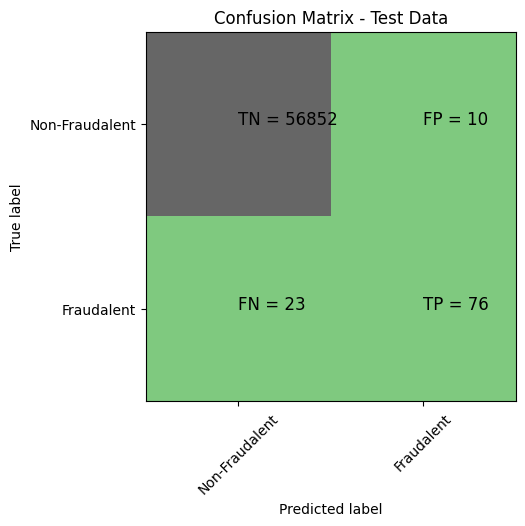

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.88      0.77      0.82        99

    accuracy                           1.00     56961
   macro avg       0.94      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9682998249527742
XGBoost threshold: 0.00108252908103168
ROC for the test dataset 96.8%


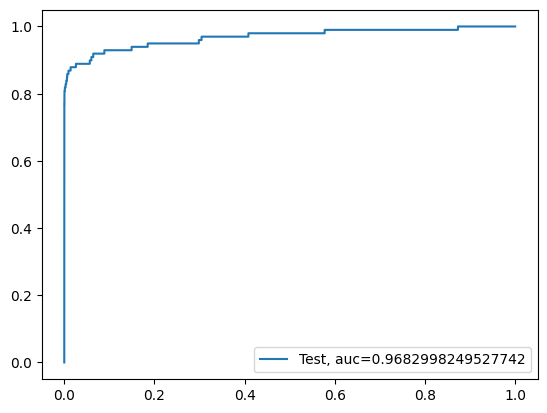

Time Taken by Model: ---144.32905316352844 seconds ---
------------------------------------------------------------


In [66]:
Data_Imbalance_Handling = "ADASYN Oversampling with StratifiedKFold CV"
#Run Logistic Regression with L1 and L2 Regularisation

print("Logistic Regression with L1 and L2 regularisation")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run Decision Tree with 'gini' & 'entropy' criteria
print("Decision TRee Models with 'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)

#Run XGBoost Model
print("Run XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN, X_test, y_test)
print("Time Taken by Model: ---%s seconds ---" % (time.time() - start_time))
print('-'*60)


In [68]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold,roc_vallue,threshhold,Threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularisation,0.998982,0.984340,0.001296,NaN,NaN,NaN
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularisation,0.999052,0.866637,0.108015,NaN,NaN,NaN
2,RepeatedKfold Cross Validation,KNN,0.999333,NaN,NaN,0.889291,0.2,NaN
3,RepeatedKFold Cross Validation,Tree Model with gini criteria,0.999210,0.884431,NaN,NaN,NaN,1.0
4,RepeatedKFold Cross Validation,Tree Model with entropy criteria,0.999228,0.879641,NaN,NaN,NaN,1.0
5,RepeatedKFold Cross Validation,Random Forest,0.999491,0.940650,0.030000,NaN,NaN,NaN
6,RepeatedKFold Cross Validation,XGBoost,0.999456,0.972669,0.000037,NaN,NaN,NaN
7,RepeatedKFold Cross Validation,SVM,0.998209,0.491581,0.002189,NaN,NaN,NaN
8,Random Oversampling with StratifiedKFold CV,Logistic Regression with L2 Regularisation,0.985429,0.981063,0.337588,NaN,NaN,NaN
9,Random Oversampling with StratifiedKFold CV,Logistic Regression with L1 Regularisation,0.998262,0.500000,1.500000,NaN,NaN,NaN


Hyperparameter Tuning
HPT- Xgboost Regresssion

In [71]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators': range(60,130,150),
    'learning_rate':[0.05,0.1,0.125,0.15,0.2],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(7,10)],
    'colsample_bytree':[i/10.0 for i in range(7,10)]

}
gsearch1 = RandomizedSearchCV(estimator = XGBClassifier(base_score=0.5, booster = 'gbtree', colsample_bylevel=1,
                                                        colsample_bynode=1,max_delta_step=0,
                                                        missing=None, n_jobs=-1,
                                                        nthread=None, objective='binary:logistic', random_state=42,
                                                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                                        silent=None, verbosity=1),
                              param_distributions = param_test, n_iter=5, scoring ='roc_auc', n_jobs =-1, cv=5)

gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([48.58594036, 42.62806177, 62.35657783, 69.68895307, 41.22793608]),
  'std_fit_time': array([1.14691941, 1.51979099, 0.14659233, 0.33433267, 5.86713445]),
  'mean_score_time': array([0.01216755, 0.01080074, 0.01021652, 0.01230669, 0.00789337]),
  'std_score_time': array([0.00341807, 0.00333906, 0.00210911, 0.0069882 , 0.0013519 ]),
  'param_subsample': masked_array(data=[0.9, 0.7, 0.7, 0.9, 0.8],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 1, 3, 5],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_max_depth': masked_array(data=[3, 3, 5, 5, 3],
               mask=[False, False, False, False, False],
  